In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
! pip install scikit-bio

     |████████████████████████████████| 8.4MB 4.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for hdmedians: filename=hdmedians-0.14.1-cp36-cp36m-linux_x86_64.whl size=454642 sha256=d27d5fc5d2efc13aae8eedfdbe488d7e291e8d4571796132e6879c47018a47bd
  Stored in directory: /root/.cache/pip/wheels/7f/ea/70/21037e458501b8037d7e7fc8818fea8690bb1203339d1cd7e8
Successfully built hdmedians
  Created wheel for scikit-bio: filename=scikit_bio-0.5.6-cp36-cp36m-linux_x86_64.whl size=1453815 sha256=c018bb607e572ee34e418a902b1123dc075564a205833469749530e989d63db0
  Stored in directory: /root/.cache/pip/wheels/1b/a9/f8/a46766b84d16bc409df4330f3a74dde61c5cf8400fed003a70
Successfully built scikit-bio


In [3]:
import matplotlib
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from datetime import datetime
import skbio.stats.composition as cp
import time
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

# Read data

In [4]:
start = datetime.now()
OTUs = np.load('/content/drive/MyDrive/class/STAT542/project/OUT_all_provided/provided_OTU_uniquified.npy')
#OTUs = np.load('/content/drive/MyDrive/class/STAT542/project/OUT_all_provided/provided_OTU.npy')
end = datetime.now()
(start -end).total_seconds()

-3.562139

In [5]:
start = datetime.now()
f = open('/content/drive/MyDrive/class/STAT542/project/OUT_all_provided/provided_OTU_names.txt')
OTU_names = f.read()
f.close()
OTU_names = OTU_names.split('\n')[:-1]
OTU_names.sort()
end = datetime.now()
(start -end).total_seconds()

-0.968292

In [6]:
OTUs = cp.multiplicative_replacement(OTUs)    # zero replacement
OTUs = cp.clr(OTUs)    # log transform

In [7]:
tem_select = []
for i in range(len(OTU_names)):
    if "unspecified" in OTU_names[i]:
        if OTU_names[i].endswith("unspecified"):
            tem_select.append(OTU_names[i])
    else:
        tem_select.append(OTU_names[i])
len(tem_select)


4106

In [8]:
age_cat = pd.read_csv('/content/drive/MyDrive/class/STAT542/project/OUT_all_provided/provided_OTU_age_cat.txt',index_col=0)
bmi_cat = pd.read_csv('/content/drive/MyDrive/class/STAT542/project/OUT_all_provided/provided_OTU_bmi_cat.txt',index_col=0)
race = pd.read_csv('/content/drive/MyDrive/class/STAT542/project/OUT_all_provided/provided_OTU_race.txt',index_col=0)
sex = pd.read_csv('/content/drive/MyDrive/class/STAT542/project/OUT_all_provided/provided_OTU_sex.txt',index_col=0)
alco_fre = pd.read_csv('/content/drive/MyDrive/class/STAT542/project/OUT_all_provided/provided_OTU_alcohol_frequency.txt',index_col=0)

In [30]:
f = open('/content/drive/MyDrive/class/STAT542/project/OUT_all_provided/provided_OTU_names.txt', 'r')
OTU_names = f.read().split('\n')
f.close()
OTU_names = sorted(OTU_names)

In [31]:
select_name = []

for i in range(len(OTU_names)):
    if OTU_names[i].endswith('unspecified'):
        select_name.append(OTU_names[i])
    elif 'unspecified' not in OTU_names[i]:
        select_name.append(OTU_names[i])
len(select_name)

4107

In [11]:
len(race)

8282

In [12]:
len(bmi_cat)

8282

In [13]:
np.unique(alco_fre)

array(['Daily', 'Never', 'Occasionally (1-2 times/week)',
       'Rarely (a few times/month)', 'Regularly (3-5 times/week)'],
      dtype=object)

In [14]:
np.unique(sex)

array(['female', 'male', 'other'], dtype=object)

In [15]:
np.unique(race)

array(['African American', 'Asian or Pacific Islander', 'Caucasian',
       'Hispanic', 'Other'], dtype=object)

In [16]:
np.unique(bmi_cat)

array(['Normal', 'Obese', 'Overweight', 'Underweight'], dtype=object)

In [17]:
np.unique(age_cat)

array(['20s', '30s', '40s', '50s', '60s', '70+', 'child', 'teen'],
      dtype=object)

# Data transformation

In [18]:
age_cat = np.array(age_cat.age_cat)
bmi_cat = np.array(bmi_cat.bmi_cat)
race = np.array(race.race)
sex = np.array(sex.sex)
alco_fre = np.array(alco_fre.alcohol_frequency)
sex

array(['female', 'male', 'female', ..., 'male', 'male', 'female'],
      dtype=object)

In [19]:
# change the character to number 

alco_dic = {
    1: 'Daily',
    5: 'Never',
    3: 'Occasionally (1-2 times/week)',
    2: "Regularly (3-5 times/week)",
    4: "Rarely (a few times/month)"
}

alco_fre[alco_fre=='Daily'] = 1
alco_fre[alco_fre=='Never'] = 5
alco_fre[alco_fre=='Occasionally (1-2 times/week)'] = 3
alco_fre[alco_fre=='Regularly (3-5 times/week)'] = 2
alco_fre[alco_fre=='Rarely (a few times/month)'] = 4

In [20]:
# change the character to number 

sex_dic = {
    1: 'male',
    2: 'female',
    3: 'other'
}

sex[sex=='male'] = 1
sex[sex=='female'] = 2
sex[sex=='other'] = 3

In [21]:
# change the age cat into number

age_dic = {
    0: 'child',
    1: 'teen',
    2: '20s',
    3: '30s',
    4: "40s",
    5: "50s",
    6: "60s",
    7: "70+"
}

age_cat[age_cat=='child'] = 0
age_cat[age_cat=='teen'] = 1
age_cat[age_cat=='20s'] = 2
age_cat[age_cat=='30s'] = 3
age_cat[age_cat=='40s'] = 4
age_cat[age_cat=='50s'] = 5
age_cat[age_cat=='60s'] = 6
age_cat[age_cat=='70+'] = 7

In [22]:
# change the bmi cat into number

bmi_dic = {
    1:'Normal',
    2:'Obese',
    3:'Overweight',
    4:"Underweight"
}

bmi_cat[bmi_cat=='Normal'] = 1
bmi_cat[bmi_cat=='Obese'] = 2
bmi_cat[bmi_cat=='Overweight'] = 3
bmi_cat[bmi_cat=='Underweight'] = 4

In [23]:
# change the bmi cat into number
race_dic = {
    1:'African American',
    2:'Asian or Pacific Islander',
    3:'Caucasian',
    4:'Hispanic',
    5:'Other'
}
race[race=='African American'] = 1
race[race=='Asian or Pacific Islander'] = 2
race[race=='Caucasian'] = 3
race[race=='Hispanic'] = 4
race[race=='Other'] = 5

In [24]:
BMI = np.loadtxt('/content/drive/MyDrive/class/STAT542/project/OUT_all_provided/provided_OTU_bmi.txt', delimiter=',', skiprows=1, usecols=1)
BMI.shape

(8282,)

In [32]:
select_name[1]
select_name = select_name[1:]

In [33]:
for i in range(len(select_name)):
    select_name[i] = select_name[i].split('|')

select_name = np.array(select_name)

In [34]:
select_name.shape

(4106, 7)

In [37]:
np.unique(select_name[:,0])

array(['k__Archaea', 'k__Bacteria'], dtype='<U43')

In [38]:
np.unique(select_name[:,1])

array(['p__Acidobacteria', 'p__Actinobacteria', 'p__Armatimonadetes',
       'p__BRC1', 'p__Bacteria', 'p__Bacteroidetes', 'p__Caldiserica',
       'p__Chlorobi', 'p__Chloroflexi', 'p__Crenarchaeota',
       'p__Cyanobacteria', 'p__Deferribacteres', 'p__Elusimicrobia',
       'p__Euryarchaeota', 'p__FBP', 'p__Firmicutes', 'p__Fusobacteria',
       'p__GN02', 'p__Gemmatimonadetes', 'p__Lentisphaerae', 'p__NKB19',
       'p__Nitrospirae', 'p__OD1', 'p__OP11', 'p__OP3', 'p__OP8',
       'p__Parvarchaeota', 'p__Planctomycetes', 'p__Proteobacteria',
       'p__Spirochaetes', 'p__Synergistetes', 'p__TM6', 'p__TM7',
       'p__Tenericutes', 'p__Thermi', 'p__Verrucomicrobia', 'p__WPS-2'],
      dtype='<U43')

In [42]:
len(np.unique(select_name[:,1]))

37

In [40]:
np.unique(select_name[:,2])

array(['c__3BR-5F', 'c__4C0d-2', 'c__Acidimicrobiia', 'c__Acidobacteria',
       'c__Acidobacteria-2', 'c__Acidobacteria-5', 'c__Acidobacteria-6',
       'c__Acidobacteriia', 'c__Actinobacteria', 'c__Alphaproteobacteria',
       'c__Anaerolineae', 'c__Armatimonadia', 'c__BD1-5', 'c__BD4-9',
       'c__BSV26', 'c__Bacilli', 'c__Bacteria', 'c__Bacteroidetes',
       'c__Bacteroidia', 'c__Betaproteobacteria', 'c__Bljii12',
       'c__Chloracidobacteria', 'c__Chlorobi', 'c__Chloroflexi',
       'c__Chloroplast', 'c__Clostridia', 'c__Coriobacteriia',
       'c__Cyanobacteria', 'c__Cytophagia', 'c__Deferribacteres',
       'c__Deinococci', 'c__Deltaproteobacteria', 'c__Ellin6529',
       'c__Elusimicrobia', 'c__Endomicrobia', 'c__Epsilonproteobacteria',
       'c__Erysipelotrichi', 'c__Euryarchaeota', 'c__FBP',
       'c__Fimbriimonadia', 'c__Firmicutes', 'c__Flavobacteriia',
       'c__Fusobacteriia', 'c__GN05', 'c__Gammaproteobacteria',
       'c__Gemm-1', 'c__Gemm-2', 'c__Gemm-3', 'c__Gem

In [41]:
len(np.unique(select_name[:,2]))

111

# Data visualization

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

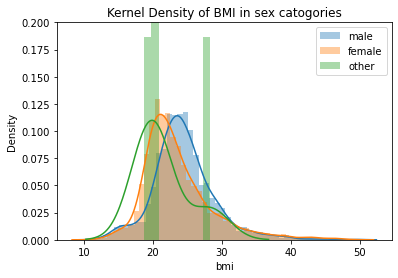

In [ ]:
fig, ax = plt.subplots()

sns.distplot(BMI[sex==1], ax=ax, label=sex_dic[1])
sns.distplot(BMI[sex==2], ax=ax, label=sex_dic[2])
sns.distplot(BMI[sex==3], ax=ax, label=sex_dic[3])

ax.set_title('Kernel Density of BMI in sex catogories')
ax.set_ylim(-0.0,0.2)
ax.set_xlabel('bmi')
plt.legend()

#plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/Kernel_Density_of_BMI_in_sex_catogories')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

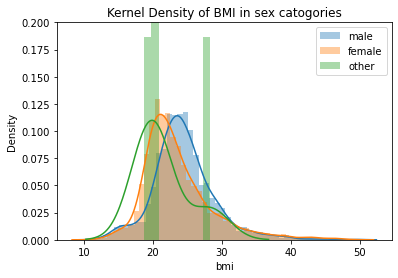

In [ ]:
fig, ax = plt.subplots()

sns.distplot(BMI[sex==1], ax=ax, label=sex_dic[1])
sns.distplot(BMI[sex==2], ax=ax, label=sex_dic[2])
sns.distplot(BMI[sex==3], ax=ax, label=sex_dic[3])

ax.set_title('Kernel Density of BMI in sex catogories')
ax.set_ylim(-0.0,0.2)
ax.set_xlabel('bmi')
plt.legend()
#plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/Kernel_Density_of_BMI_in_sex_catogories')

In [ ]:
print('class:\tmean:\tstd:')
print("%s\t%f\t%f"%(sex_dic[1],np.mean(BMI[sex==1]),(np.std(BMI[sex==1]))))
print("%s\t%f\t%f"%(sex_dic[2],np.mean(BMI[sex==2]),(np.std(BMI[sex==2]))))
print("%s\t%f\t%f"%(sex_dic[3],np.mean(BMI[sex==3]),(np.std(BMI[sex==3]))))

class:	mean:	std:
male	24.417278	4.529845
female	23.507082	5.077008
other	21.530000	3.470089


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

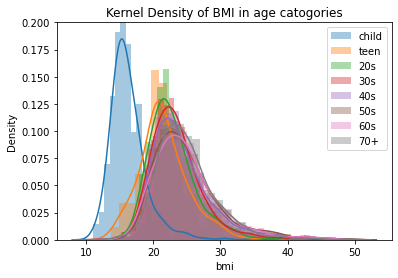

In [ ]:
fig, ax = plt.subplots()

sns.distplot(BMI[age_cat==0], ax=ax, label=age_dic[0])
sns.distplot(BMI[age_cat==1], ax=ax, label=age_dic[1])
sns.distplot(BMI[age_cat==2], ax=ax, label=age_dic[2])
sns.distplot(BMI[age_cat==3], ax=ax, label=age_dic[3])
sns.distplot(BMI[age_cat==4], ax=ax, label=age_dic[4])
sns.distplot(BMI[age_cat==5], ax=ax, label=age_dic[5])
sns.distplot(BMI[age_cat==6], ax=ax, label=age_dic[6])
sns.distplot(BMI[age_cat==7], ax=ax, label=age_dic[7])

ax.set_title('Kernel Density of BMI in age catogories')
ax.set_xlabel('bmi')
ax.set_ylim(-0.0,0.2)
plt.legend()
#plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/Kernel_Density_of_BMI_in_age_catogories')

In [ ]:
len(BMI[age_cat==0])

341

In [ ]:
print('class:\tmean:\tstd:')
print("%s\t%f\t%f"%(age_dic[0],np.mean(BMI[age_cat==0]),(np.std(BMI[age_cat==0]))))
print("%s\t%f\t%f"%(age_dic[1],np.mean(BMI[age_cat==1]),(np.std(BMI[age_cat==1]))))
print("%s\t%f\t%f"%(age_dic[2],np.mean(BMI[age_cat==2]),(np.std(BMI[age_cat==2]))))
print("%s\t%f\t%f"%(age_dic[3],np.mean(BMI[age_cat==3]),(np.std(BMI[age_cat==3]))))
print("%s\t%f\t%f"%(age_dic[4],np.mean(BMI[age_cat==4]),(np.std(BMI[age_cat==4]))))
print("%s\t%f\t%f"%(age_dic[5],np.mean(BMI[age_cat==5]),(np.std(BMI[age_cat==5]))))
print("%s\t%f\t%f"%(age_dic[6],np.mean(BMI[age_cat==6]),(np.std(BMI[age_cat==6]))))
print("%s\t%f\t%f"%(age_dic[7],np.mean(BMI[age_cat==7]),(np.std(BMI[age_cat==7]))))

class:	mean:	std:
child	16.352199	3.042208
teen	21.745656	3.856086
20s	22.944132	3.765047
30s	23.447200	3.868587
40s	24.379589	4.805384
50s	24.967250	5.035630
60s	24.893683	4.968306
70+	24.853971	4.350037


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

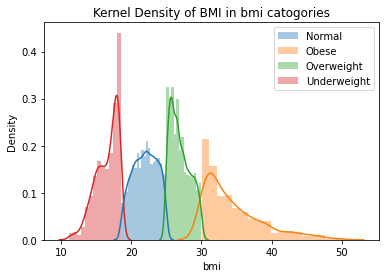

In [ ]:
fig, ax = plt.subplots()

sns.distplot(BMI[bmi_cat==1], ax=ax, label=bmi_dic[1])
sns.distplot(BMI[bmi_cat==2], ax=ax, label=bmi_dic[2])
sns.distplot(BMI[bmi_cat==3], ax=ax, label=bmi_dic[3])
sns.distplot(BMI[bmi_cat==4], ax=ax, label=bmi_dic[4])


ax.set_title('Kernel Density of BMI in bmi catogories')
#ax.set_ylim(-0.0,0.2)
ax.set_xlabel('bmi')
plt.legend()
#plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/Kernel_Density_of_BMI_in_bmi_catogories')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

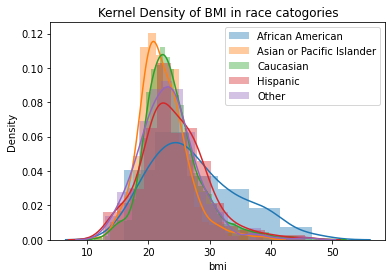

In [ ]:
fig, ax = plt.subplots()

sns.distplot(BMI[race==1], ax=ax, label=race_dic[1])
sns.distplot(BMI[race==2], ax=ax, label=race_dic[2])
sns.distplot(BMI[race==3], ax=ax, label=race_dic[3])
sns.distplot(BMI[race==4], ax=ax, label=race_dic[4])
sns.distplot(BMI[race==5], ax=ax, label=race_dic[5])

ax.set_title('Kernel Density of BMI in race catogories')
#ax.set_ylim(-0.0,0.2)
ax.set_xlabel('bmi')
plt.legend()
#plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/Kernel_Density_of_BMI_in_race_catogories')

In [ ]:
print('class:\tmean:\tstd:')
print("%s\t%f\t%f"%(race_dic[1],np.mean(BMI[race==1]),(np.std(BMI[race==1]))))
print("%s\t%f\t%f"%(race_dic[2],np.mean(BMI[race==2]),(np.std(BMI[race==2]))))
print("%s\t%f\t%f"%(race_dic[3],np.mean(BMI[race==3]),(np.std(BMI[race==3]))))
print("%s\t%f\t%f"%(race_dic[4],np.mean(BMI[race==4]),(np.std(BMI[race==4]))))
print("%s\t%f\t%f"%(race_dic[5],np.mean(BMI[race==5]),(np.std(BMI[race==5]))))

class:	mean:	std:
African American	27.512642	6.956240
Asian or Pacific Islander	22.410370	3.927814
Caucasian	23.988033	4.848388
Hispanic	24.196391	5.309002
Other	23.242941	4.770668


In [ ]:
[sex_dic[1]]

['male']

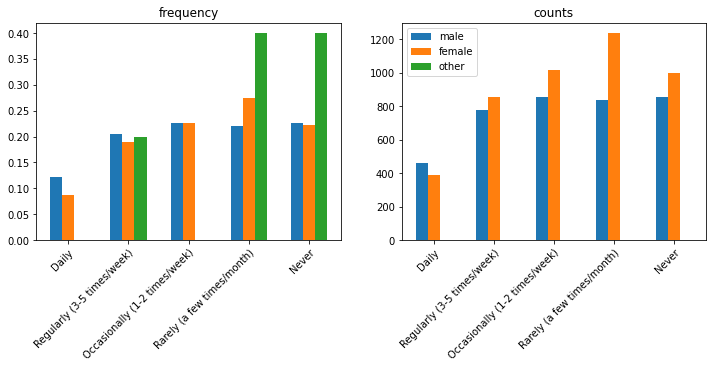

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
for i in range(3):
    tem_alch = alco_fre[sex==(i+1)]
    a = pd.value_counts(tem_alch)
    ax[0].bar(np.array(a.index)+i*0.2-0.2,np.array(a)/sum(np.array(a)),width=0.2, label=sex_dic[i+1])
    ax[1].bar(np.array(a.index)+i*0.2-0.2,np.array(a),width=0.2, label=sex_dic[i+1])

ax[0].set_title('frequency')
ax[1].set_title('counts')
ax[0].set_xticklabels(['',alco_dic[1],alco_dic[2],alco_dic[3],alco_dic[4],alco_dic[5]])
ax[1].set_xticklabels(['',alco_dic[1],alco_dic[2],alco_dic[3],alco_dic[4],alco_dic[5]])
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.legend()
#plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/bar_plot_of_alc_fre_in_sex_catogories')

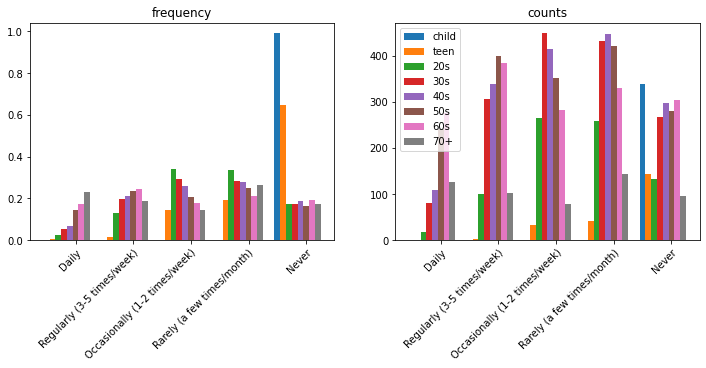

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
for i in range(8):
    tem_alch = alco_fre[age_cat==(i)]
    a = pd.value_counts(tem_alch)
    ax[0].bar(np.array(a.index)+i*0.1+0.5,np.array(a)/sum(np.array(a)),width=0.1, label=age_dic[i])
    ax[1].bar(np.array(a.index)+i*0.1+0.5,np.array(a),width=0.1, label=age_dic[i])

ax[0].set_title('frequency')
ax[1].set_title('counts')
ax[0].set_xticklabels(['',alco_dic[1],alco_dic[2],alco_dic[3],alco_dic[4],alco_dic[5]])
ax[1].set_xticklabels(['',alco_dic[1],alco_dic[2],alco_dic[3],alco_dic[4],alco_dic[5]])
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.legend()
#plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/bar_plot_of_alc_fre_in_age_catogories')

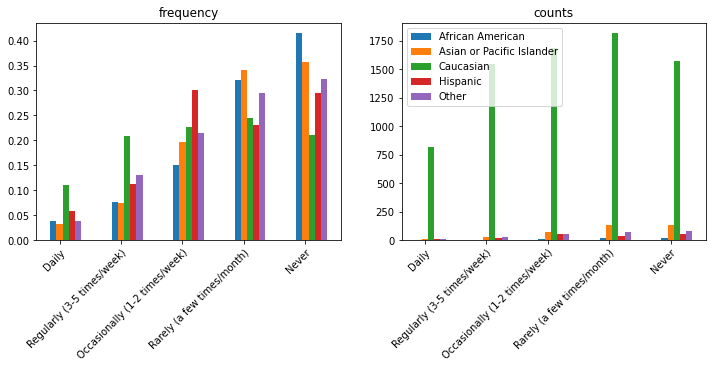

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
for i in range(5):
    tem_alch = alco_fre[race==(i+1)]
    a = pd.value_counts(tem_alch)
    ax[0].bar(np.array(a.index)+i*0.1-0.1,np.array(a)/sum(np.array(a)),width=0.1, label=race_dic[i+1])
    ax[1].bar(np.array(a.index)+i*0.1-0.1,np.array(a),width=0.1, label=race_dic[i+1])

ax[0].set_title('frequency')
ax[1].set_title('counts')
ax[0].set_xticklabels(['',alco_dic[1],alco_dic[2],alco_dic[3],alco_dic[4],alco_dic[5]])
ax[1].set_xticklabels(['',alco_dic[1],alco_dic[2],alco_dic[3],alco_dic[4],alco_dic[5]])
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.legend()
#plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/bar_plot_of_alc_fre_in_race_catogories')

In [ ]:
n_race = []
for i in range(1,6):
    n_race.append(OTUs[race==i,].shape[0])
    print(i, OTUs[race==i,].shape)

1 (53, 4106)
2 (378, 4106)
3 (7444, 4106)
4 (169, 4106)
5 (238, 4106)


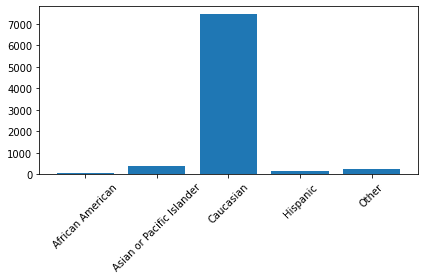

In [ ]:
plt.bar([1,2,3,4,5], n_race)
plt.xticks([1,2,3,4,5],[race_dic[1],race_dic[2],race_dic[3],race_dic[4],race_dic[5]],rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/bar_plot_race_catogories')

In [ ]:
7444/8282

0.8988167109393866

In [ ]:
# select data that the race is Caucasian
select_OTUs = OTUs[race==3,]
select_BMI = BMI[race==3]
select_age_cat = age_cat[race==3]
select_bmi_cat = bmi_cat[race==3]
select_sex = sex[race==3]
select_alco = alco_fre[race==3]

select_OTUs.shape

(7444, 4106)

## sub-group analysis
1. divided by race： majority of the race is Caucasian, thus, the regression is only based on Caucasian
2. divided by sex: male and female
3. BMI: classfied by ages (child, teen, 20s+30s, 40+)

#Classification

method:
  1. k-nearest
  2. SVD
  3. LDA or QDA

##Classification for alcho-frequency
Maybe consider do this in each age range



In [ ]:
n_age = []
for i in range(8):
    n_age.append(select_OTUs[select_age_cat==i,].shape[0])
    print(select_OTUs[select_age_cat==i,].shape)

(271, 4106)
(177, 4106)
(612, 4106)
(1308, 4106)
(1465, 4106)
(1581, 4106)
(1504, 4106)
(526, 4106)


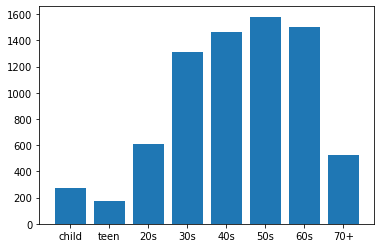

In [ ]:
plt.bar([0,1,2,3,4,5,6,7], n_age)
plt.xticks([0,1,2,3,4,5,6,7],[age_dic[0],age_dic[1],age_dic[2],age_dic[3],age_dic[4],age_dic[5],age_dic[6],age_dic[7]])
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/bar_plot_age_Caucasian')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tempfile import TemporaryDirectory

from sklearn.neighbors import KNeighborsTransformer, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


In [ ]:
'''
scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(select_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

#X_train, X_test, y_train, y_test = train_test_split(tem_OTUs, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)

# Scree plot
x = [f'PC{i+1}' for i in range(n_pc)]
height = list(tem_pca.explained_variance_ratio_)
plt.bar(x, height)
plt.title('PCA explained variance (20s)')

#plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/PCA_variance_20s', dpi=300)
'''

###knn classification for alcho frequency, using PCA

best mean training accurace in cross validataion:	 0.24011516314779274


0.2242614145031334

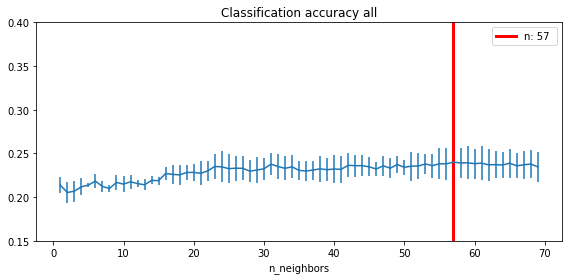

In [ ]:
# this is for all

tem_OTUs = select_OTUs
tem_alco = select_alco

scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

# Scree plot
x = [f'PC{i+1}' for i in range(n_pc)]
height = list(tem_pca.explained_variance_ratio_)
plt.bar(x, height)
plt.ylim(0,0.7)
plt.title('PCA explained variance (20s)')

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/PCA_variance_all', dpi=300)
plt.clf()
plt.close()

# pair-wise pca

fig, ax = plt.subplots(ncols=n_pc, nrows=n_pc, constrained_layout=True, figsize=(28, 28))
fig.suptitle("pair-wised PCA")
for i in range(n_pc):
    for j in range(n_pc):
        if i == j:
            ax[i,j].text(0.45, 0.05, f'PC{i+1}')
            ax[i,j].text(0.05, 0.45, f'Other PCs', rotation=90)
        else:
            pcx = tem_pca_mat[:,i]
            pcy = tem_pca_mat[:,j]
            scalex = 1.0/(pcx.max() - pcx.min())
            scaley = 1.0/(pcy.max() - pcy.min())
            ax[i,j].scatter(pcx * scalex, pcy * scaley, alpha=0.1, color='black')
fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/PCA_all', dpi=300)
plt.clf()
plt.close()

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_alco, stratify=tem_alco, test_size=0.3, random_state=1)

n_neighbors_list = range(1,70)
# The transformer computes the nearest neighbors graph using the maximum number
# of neighbors necessary in the grid search. The classifier model filters the
# nearest neighbors graph as required by its own n_neighbors parameter.
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list),
                                    mode='distance')
classifier_model = KNeighborsClassifier(metric='precomputed')

# Note that we give `memory` a directory to cache the graph computation
# that will be used several times when tuning the hyperparameters of the
# classifier.
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[('graph', graph_model), ('classifier', classifier_model)],
        memory=tmpdir)

    param_grid = {'classifier__n_neighbors': n_neighbors_list}
    grid_model_pca = GridSearchCV(full_model, param_grid)
    grid_model_pca.fit(X_train, y_train.astype('int'))

# Plot the results of the grid search.
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.errorbar(x=n_neighbors_list,
                 y=grid_model_pca.cv_results_['mean_test_score'],
                 yerr=grid_model_pca.cv_results_['std_test_score'])
axes.set(xlabel='n_neighbors', title='Classification accuracy all')
axes.axvline(grid_model_pca.best_index_+1, color='red', linewidth=3,
                label='n: %d '%(grid_model_pca.best_index_+1))
axes.set_ylim(0.15,0.4)
fig.tight_layout()
axes.legend()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/alcho_fre_knn_pca_all',dpi=300)
#plt.clf()
#plt.close()

print('best mean training accurace in cross validataion:\t',np.max(grid_model_pca.cv_results_['mean_test_score']))
model = KNeighborsClassifier(n_neighbors=(grid_model_pca.best_index_+1))
model.fit(X_train,y_train.astype('int'))
# test accuracy
model.score(X_test,y_test.astype('int'))

In [ ]:
# this is for 20s
tem_age = 2

tem_OTUs = select_OTUs[select_age_cat==tem_age]
tem_alco = select_alco[select_age_cat==tem_age]

scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)

len(X_test)

184

Text(0.5, 1.0, 'PCA explained variance (20s)')

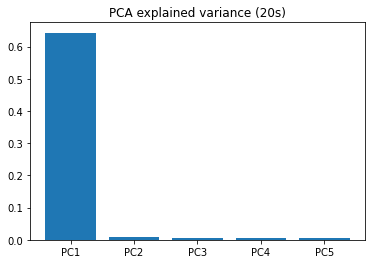

In [ ]:
# Scree plot
x = [f'PC{i+1}' for i in range(n_pc)]
height = list(tem_pca.explained_variance_ratio_)
plt.bar(x, height)
plt.title('PCA explained variance (20s)')

#plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/PCA_variance_20s', dpi=300)

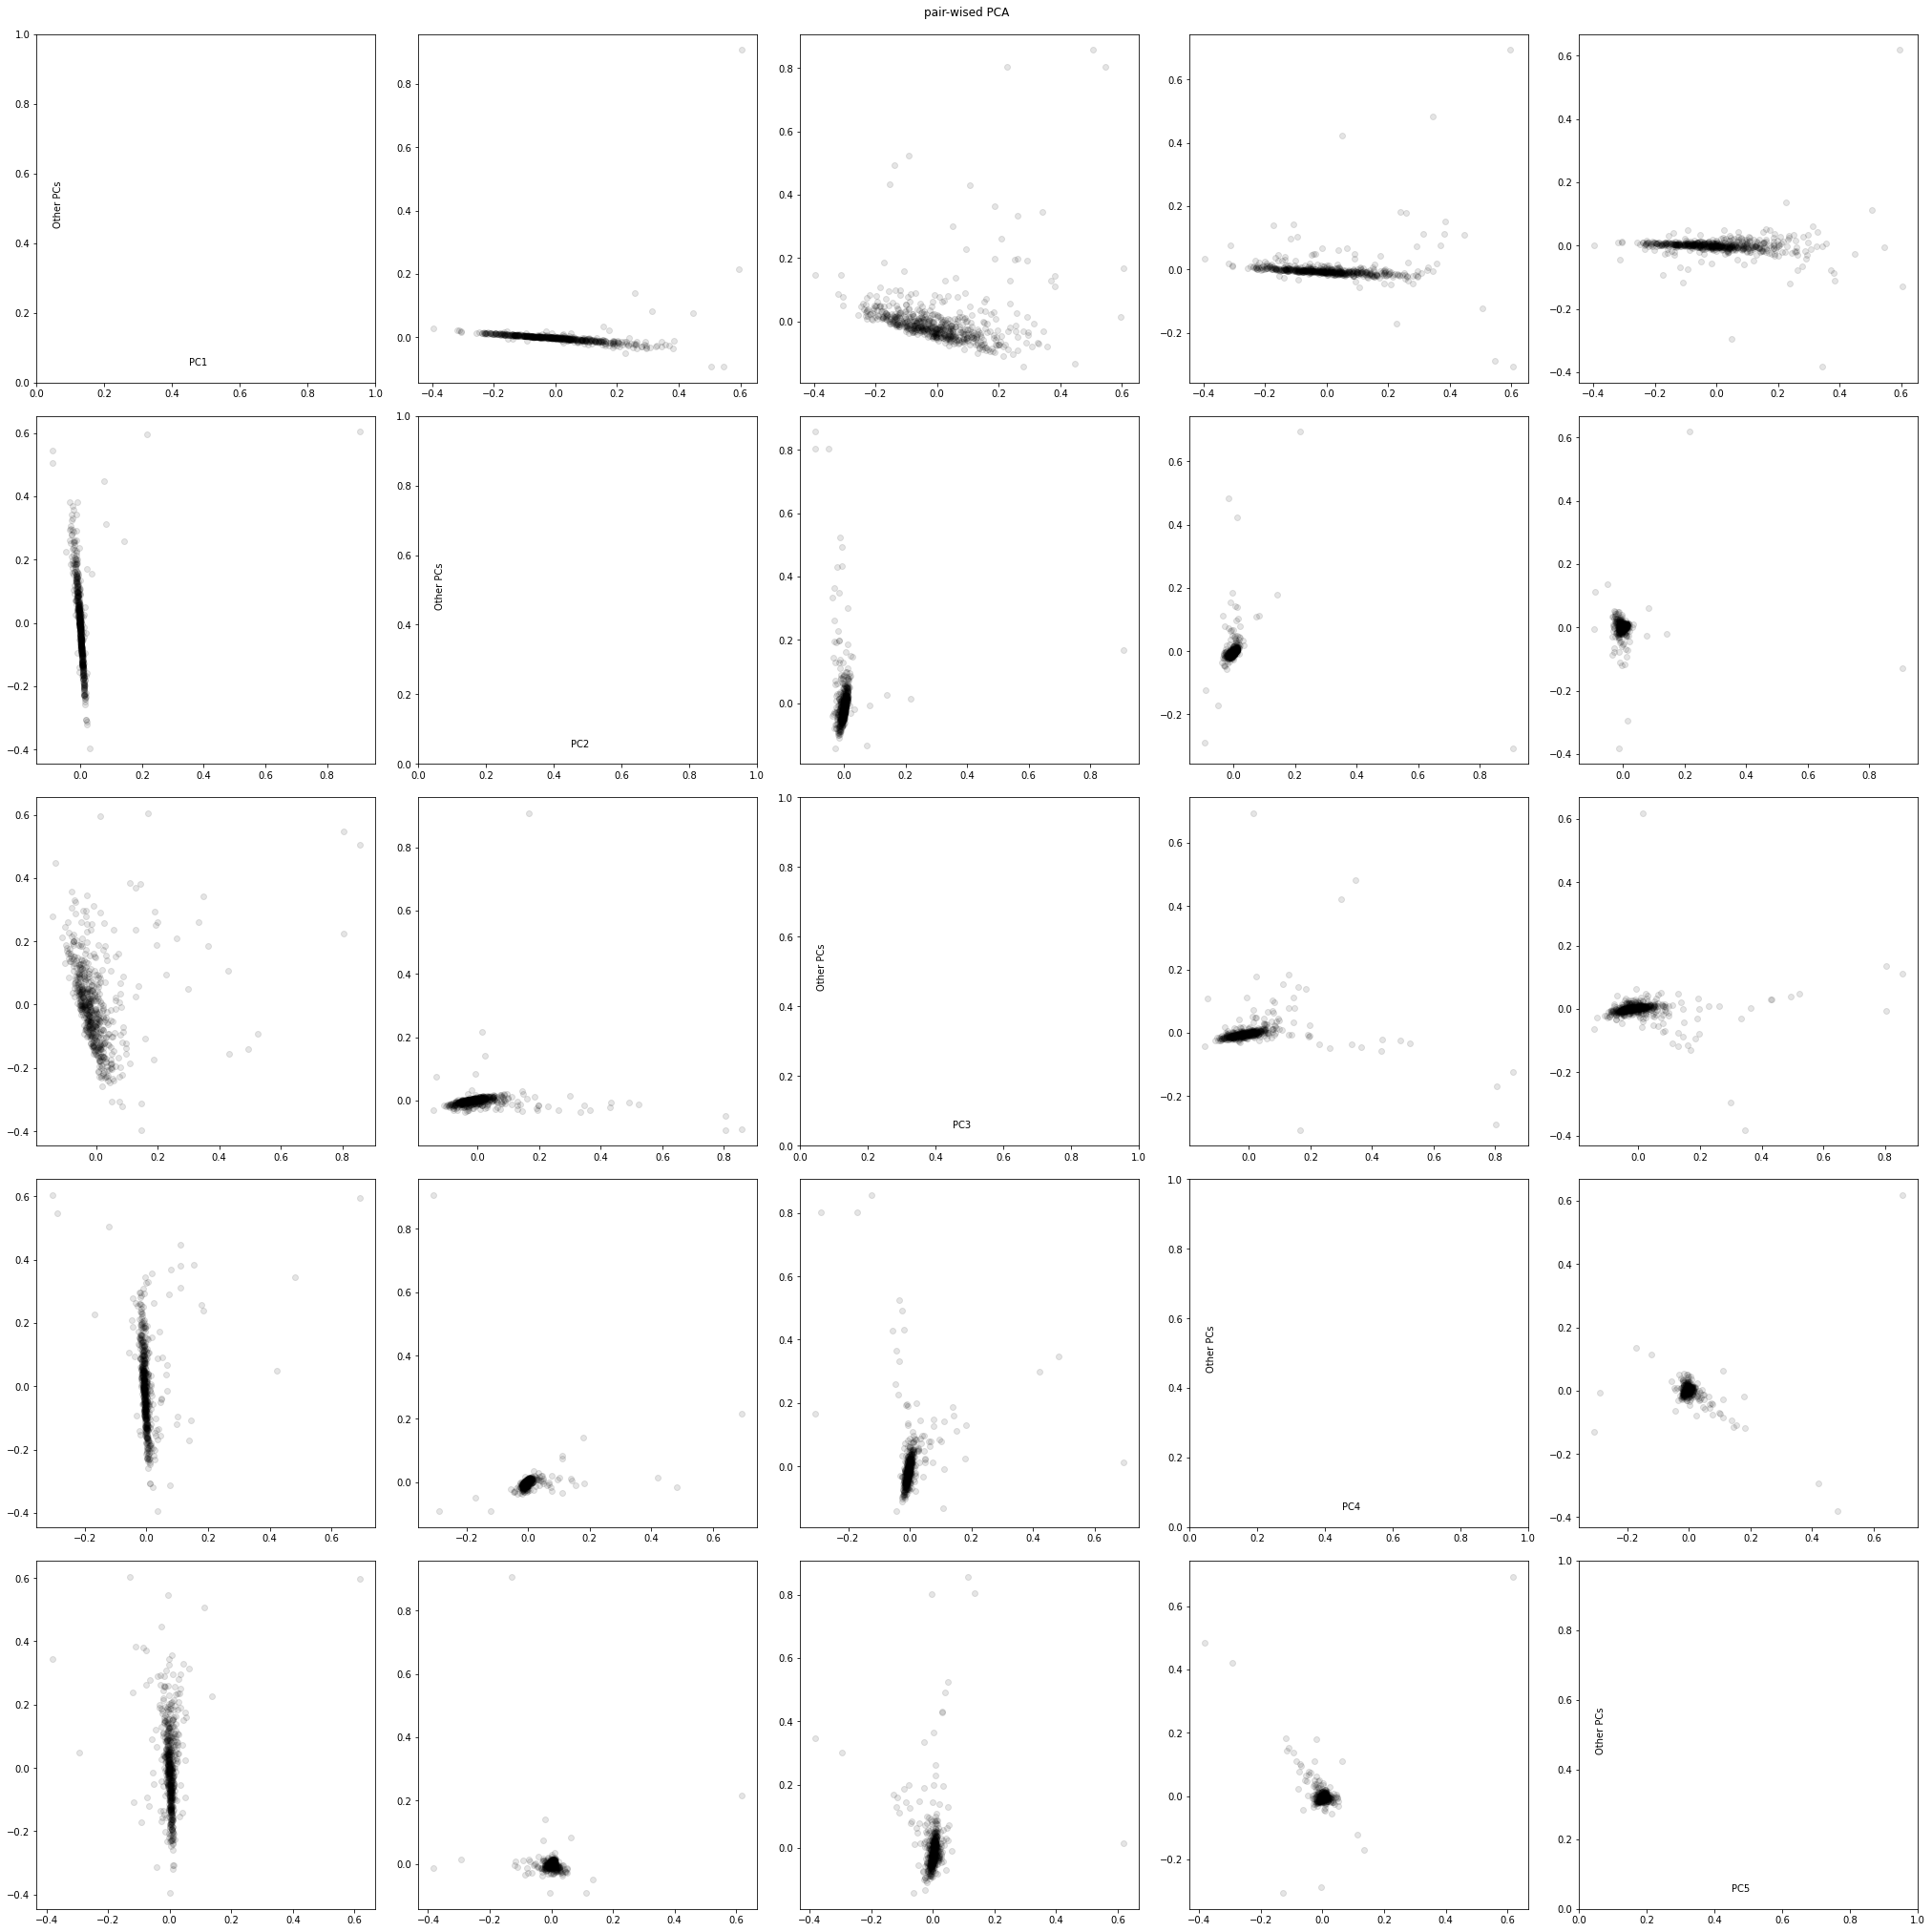

In [ ]:
# pair-wise pca

fig, ax = plt.subplots(ncols=n_pc, nrows=n_pc, constrained_layout=True, figsize=(28, 28))
fig.suptitle("pair-wised PCA")
for i in range(n_pc):
    for j in range(n_pc):
        if i == j:
            ax[i,j].text(0.45, 0.05, f'PC{i+1}')
            ax[i,j].text(0.05, 0.45, f'Other PCs', rotation=90)
        else:
            pcx = tem_pca_mat[:,i]
            pcy = tem_pca_mat[:,j]
            scalex = 1.0/(pcx.max() - pcx.min())
            scaley = 1.0/(pcy.max() - pcy.min())
            ax[i,j].scatter(pcx * scalex, pcy * scaley, alpha=0.1, color='black')
#fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/PCA_20s', dpi=300)

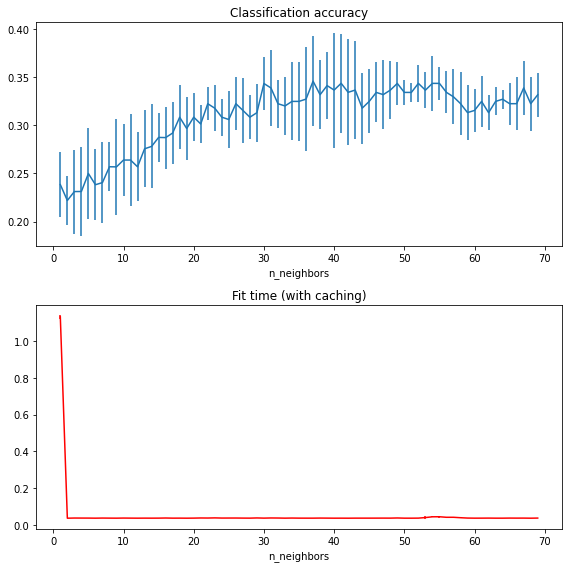

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tem_OTUs, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)

n_neighbors_list = range(1,70)
# The transformer computes the nearest neighbors graph using the maximum number
# of neighbors necessary in the grid search. The classifier model filters the
# nearest neighbors graph as required by its own n_neighbors parameter.
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list),
                                    mode='distance')
classifier_model = KNeighborsClassifier(metric='precomputed')

# Note that we give `memory` a directory to cache the graph computation
# that will be used several times when tuning the hyperparameters of the
# classifier.
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[('graph', graph_model), ('classifier', classifier_model)],
        memory=tmpdir)

    param_grid = {'classifier__n_neighbors': n_neighbors_list}
    grid_model = GridSearchCV(full_model, param_grid)
    grid_model.fit(X_train, y_train.astype('int'))

# Plot the results of the grid search.
fig, axes = plt.subplots(2, 1, figsize=(8, 8))
axes[0].errorbar(x=n_neighbors_list,
                 y=grid_model.cv_results_['mean_test_score'],
                 yerr=grid_model.cv_results_['std_test_score'])
axes[0].set(xlabel='n_neighbors', title='Classification accuracy')
axes[1].errorbar(x=n_neighbors_list, y=grid_model.cv_results_['mean_fit_time'],
                 yerr=grid_model.cv_results_['std_fit_time'], color='r')
axes[1].set(xlabel='n_neighbors', title='Fit time (with caching)')
fig.tight_layout()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/alcho_fre_knn_20s',dpi=300)



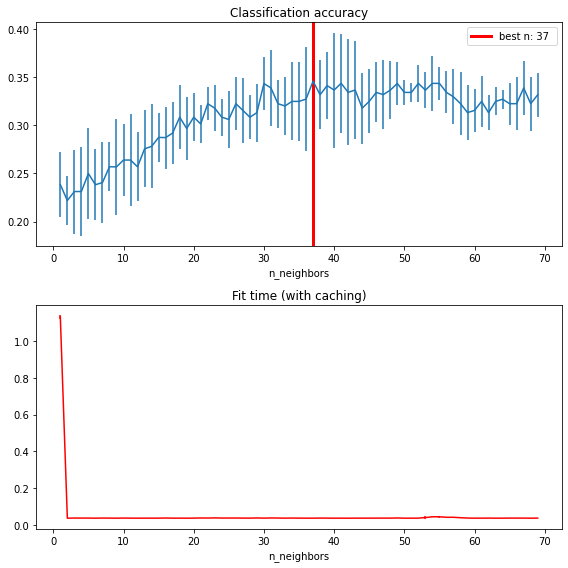

In [ ]:

# Plot the results of the grid search.
fig, axes = plt.subplots(2, 1, figsize=(8, 8))
axes[0].errorbar(x=n_neighbors_list,
                 y=grid_model.cv_results_['mean_test_score'],
                 yerr=grid_model.cv_results_['std_test_score'])
axes[0].set(xlabel='n_neighbors', title='Classification accuracy')
axes[0].axvline(grid_model.best_index_+1, color='red', linewidth=3,
                label='best n: %d '%(grid_model.best_index_+1))

axes[1].errorbar(x=n_neighbors_list, y=grid_model.cv_results_['mean_fit_time'],
                 yerr=grid_model.cv_results_['std_fit_time'], color='r')

axes[1].set(xlabel='n_neighbors', title='Fit time (with caching)')
fig.tight_layout()
axes[0].legend()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/alcho_fre_knn_20s',dpi=300)


In [ ]:
np.max(grid_model.cv_results_['mean_test_score'])

0.34582763337893296

In [ ]:
model = KNeighborsClassifier(n_neighbors=37)
model.fit(X_train,y_train.astype('int'))
# test accuracy
model.score(X_test,y_test.astype('int'))

0.33695652173913043

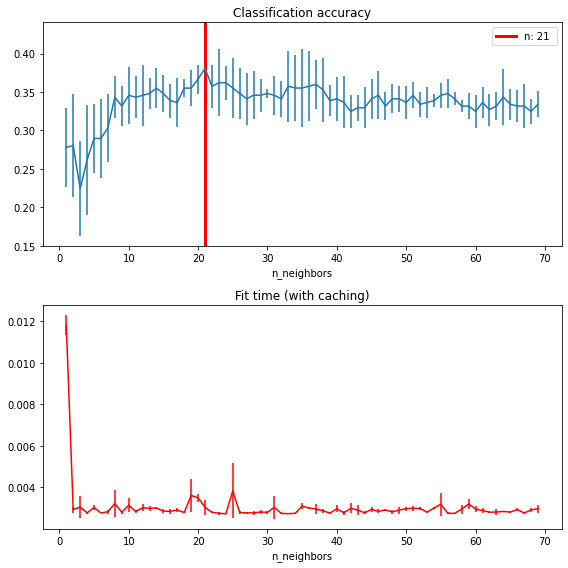

In [ ]:
n_neighbors_list = range(1,70)
# The transformer computes the nearest neighbors graph using the maximum number
# of neighbors necessary in the grid search. The classifier model filters the
# nearest neighbors graph as required by its own n_neighbors parameter.
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list),
                                    mode='distance')
classifier_model = KNeighborsClassifier(metric='precomputed')

# Note that we give `memory` a directory to cache the graph computation
# that will be used several times when tuning the hyperparameters of the
# classifier.
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[('graph', graph_model), ('classifier', classifier_model)],
        memory=tmpdir)

    param_grid = {'classifier__n_neighbors': n_neighbors_list}
    grid_model_pca = GridSearchCV(full_model, param_grid)
    grid_model_pca.fit(tem_pca_mat, tem_alco.astype('int'))

# Plot the results of the grid search.
fig, axes = plt.subplots(2, 1, figsize=(8, 8))
axes[0].errorbar(x=n_neighbors_list,
                 y=grid_model_pca.cv_results_['mean_test_score'],
                 yerr=grid_model_pca.cv_results_['std_test_score'])
axes[0].set(xlabel='n_neighbors', title='Classification accuracy')
axes[0].axvline(grid_model_pca.best_index_, color='red', linewidth=3,
                label='n: %d '%grid_model_pca.best_index_)
axes[1].errorbar(x=n_neighbors_list, y=grid_model_pca.cv_results_['mean_fit_time'],
                 yerr=grid_model_pca.cv_results_['std_fit_time'], color='r')
axes[1].set(xlabel='n_neighbors', title='Fit time (with caching)')
fig.tight_layout()
axes[0].legend()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/alcho_fre_knn_pca_20s',dpi=300)

In [ ]:
np.max(grid_model_pca.cv_results_['mean_test_score'])

0.380984952120383

In [ ]:
model = KNeighborsClassifier(n_neighbors=(grid_model_pca.best_index_+1))
model.fit(X_train,y_train.astype('int'))
# test accuracy
model.score(X_test,y_test.astype('int'))

0.29347826086956524

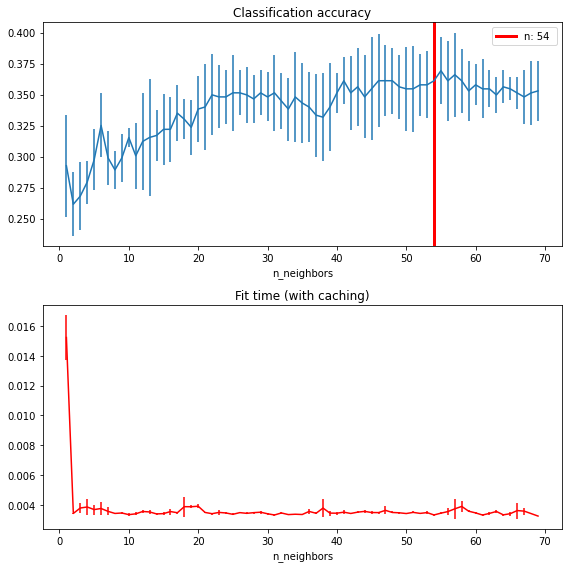

In [ ]:
# Plot the results of the grid search.
fig, axes = plt.subplots(2, 1, figsize=(8, 8))
axes[0].errorbar(x=n_neighbors_list,
                 y=grid_model_pca.cv_results_['mean_test_score'],
                 yerr=grid_model_pca.cv_results_['std_test_score'])
axes[0].set(xlabel='n_neighbors', title='Classification accuracy')
axes[0].axvline(grid_model_pca.best_index_, color='red', linewidth=3,
                label='n: %d '%grid_model_pca.best_index_)
axes[1].errorbar(x=n_neighbors_list, y=grid_model_pca.cv_results_['mean_fit_time'],
                 yerr=grid_model_pca.cv_results_['std_fit_time'], color='r')
axes[1].set(xlabel='n_neighbors', title='Fit time (with caching)')
fig.tight_layout()
axes[0].legend()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/alcho_fre_knn_pca_20s',dpi=300)

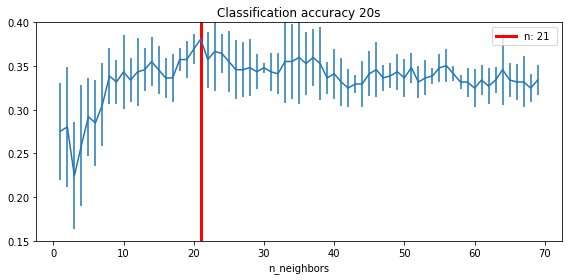

In [ ]:
# this is for 20s
tem_age = 2

tem_OTUs = select_OTUs[select_age_cat==tem_age]
tem_alco = select_alco[select_age_cat==tem_age]

scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

# Scree plot
x = [f'PC{i+1}' for i in range(n_pc)]
height = list(tem_pca.explained_variance_ratio_)
plt.bar(x, height)
plt.ylim(0,0.7)
plt.title('PCA explained variance (20s)')

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/PCA_variance_%d0s'%tem_age, dpi=300)
plt.clf()
plt.close()

# pair-wise pca

fig, ax = plt.subplots(ncols=n_pc, nrows=n_pc, constrained_layout=True, figsize=(28, 28))
fig.suptitle("pair-wised PCA")
for i in range(n_pc):
    for j in range(n_pc):
        if i == j:
            ax[i,j].text(0.45, 0.05, f'PC{i+1}')
            ax[i,j].text(0.05, 0.45, f'Other PCs', rotation=90)
        else:
            pcx = tem_pca_mat[:,i]
            pcy = tem_pca_mat[:,j]
            scalex = 1.0/(pcx.max() - pcx.min())
            scaley = 1.0/(pcy.max() - pcy.min())
            ax[i,j].scatter(pcx * scalex, pcy * scaley, alpha=0.1, color='black')
fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/PCA_%d0s'%tem_age, dpi=300)
plt.clf()
plt.close()

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)

n_neighbors_list = range(1,70)
# The transformer computes the nearest neighbors graph using the maximum number
# of neighbors necessary in the grid search. The classifier model filters the
# nearest neighbors graph as required by its own n_neighbors parameter.
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list),
                                    mode='distance')
classifier_model = KNeighborsClassifier(metric='precomputed')

# Note that we give `memory` a directory to cache the graph computation
# that will be used several times when tuning the hyperparameters of the
# classifier.
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[('graph', graph_model), ('classifier', classifier_model)],
        memory=tmpdir)

    param_grid = {'classifier__n_neighbors': n_neighbors_list}
    grid_model_pca = GridSearchCV(full_model, param_grid)
    grid_model_pca.fit(X_train, y_train.astype('int'))

# Plot the results of the grid search.
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.errorbar(x=n_neighbors_list,
                 y=grid_model_pca.cv_results_['mean_test_score'],
                 yerr=grid_model_pca.cv_results_['std_test_score'])
axes.set(xlabel='n_neighbors', title='Classification accuracy %d0s'%tem_age)
axes.axvline(grid_model_pca.best_index_+1, color='red', linewidth=3,
                label='n: %d '%(grid_model_pca.best_index_+1))
axes.set_ylim(0.15,0.4)
fig.tight_layout()
axes.legend()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/alcho_fre_knn_pca_%d0s_new'%tem_age,dpi=300)
#plt.clf()
#plt.close()

In [ ]:
np.max(grid_model_pca.cv_results_['mean_test_score'])

0.380984952120383

In [ ]:
model = KNeighborsClassifier(n_neighbors=(grid_model_pca.best_index_+1))
model.fit(X_train,y_train.astype('int'))
# test accuracy
model.score(X_test,y_test.astype('int'))

0.29891304347826086

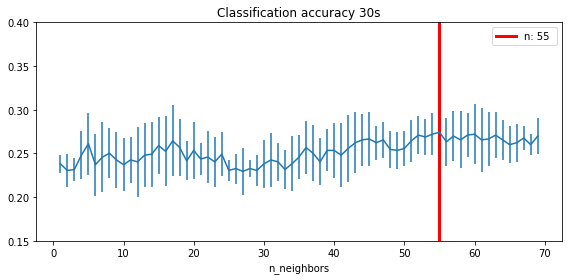

In [ ]:
# this is for 30s
tem_age = 3

tem_OTUs = select_OTUs[select_age_cat==tem_age]
tem_alco = select_alco[select_age_cat==tem_age]

scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

# Scree plot
x = [f'PC{i+1}' for i in range(n_pc)]
height = list(tem_pca.explained_variance_ratio_)
plt.bar(x, height)
plt.ylim(0,0.7)
plt.title('PCA explained variance (20s)')

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/PCA_variance_%d0s'%tem_age, dpi=300)
plt.clf()
plt.close()

# pair-wise pca

fig, ax = plt.subplots(ncols=n_pc, nrows=n_pc, constrained_layout=True, figsize=(28, 28))
fig.suptitle("pair-wised PCA")
for i in range(n_pc):
    for j in range(n_pc):
        if i == j:
            ax[i,j].text(0.45, 0.05, f'PC{i+1}')
            ax[i,j].text(0.05, 0.45, f'Other PCs', rotation=90)
        else:
            pcx = tem_pca_mat[:,i]
            pcy = tem_pca_mat[:,j]
            scalex = 1.0/(pcx.max() - pcx.min())
            scaley = 1.0/(pcy.max() - pcy.min())
            ax[i,j].scatter(pcx * scalex, pcy * scaley, alpha=0.1, color='black')
fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/PCA_%d0s'%tem_age, dpi=300)
plt.clf()
plt.close()

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)

n_neighbors_list = range(1,70)
# The transformer computes the nearest neighbors graph using the maximum number
# of neighbors necessary in the grid search. The classifier model filters the
# nearest neighbors graph as required by its own n_neighbors parameter.
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list),
                                    mode='distance')
classifier_model = KNeighborsClassifier(metric='precomputed')

# Note that we give `memory` a directory to cache the graph computation
# that will be used several times when tuning the hyperparameters of the
# classifier.
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[('graph', graph_model), ('classifier', classifier_model)],
        memory=tmpdir)

    param_grid = {'classifier__n_neighbors': n_neighbors_list}
    grid_model_pca = GridSearchCV(full_model, param_grid)
    grid_model_pca.fit(X_train, y_train.astype('int'))

# Plot the results of the grid search.
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.errorbar(x=n_neighbors_list,
                 y=grid_model_pca.cv_results_['mean_test_score'],
                 yerr=grid_model_pca.cv_results_['std_test_score'])
axes.set(xlabel='n_neighbors', title='Classification accuracy %d0s'%tem_age)
axes.axvline(grid_model_pca.best_index_+1, color='red', linewidth=3,
                label='n: %d '%(grid_model_pca.best_index_+1))
axes.set_ylim(0.15,0.4)
fig.tight_layout()
axes.legend()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/alcho_fre_knn_pca_%d0s_new'%tem_age,dpi=300)
#plt.clf()
#plt.close()



In [ ]:
np.max(grid_model_pca.cv_results_['mean_test_score'])

0.2743169398907104

In [ ]:
model = KNeighborsClassifier(n_neighbors=(grid_model_pca.best_index_+1))
model.fit(X_train,y_train.astype('int'))
# test accuracy
model.score(X_test,y_test.astype('int'))

0.30788804071246817

best mean training accurace in cross validataion:	 0.2858536585365854


0.2681818181818182

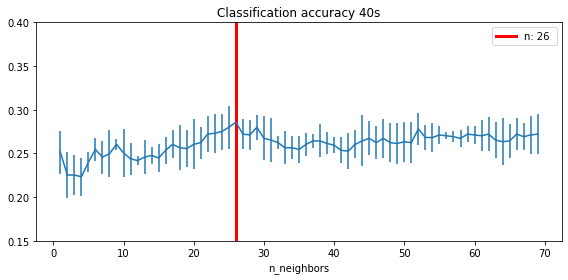

In [ ]:
# this is for 40s
tem_age = 4

tem_OTUs = select_OTUs[select_age_cat==tem_age]
tem_alco = select_alco[select_age_cat==tem_age]

scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

# Scree plot
x = [f'PC{i+1}' for i in range(n_pc)]
height = list(tem_pca.explained_variance_ratio_)
plt.bar(x, height)
plt.ylim(0,0.7)
plt.title('PCA explained variance (20s)')

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/PCA_variance_%d0s'%tem_age, dpi=300)
plt.clf()
plt.close()

# pair-wise pca

fig, ax = plt.subplots(ncols=n_pc, nrows=n_pc, constrained_layout=True, figsize=(28, 28))
fig.suptitle("pair-wised PCA")
for i in range(n_pc):
    for j in range(n_pc):
        if i == j:
            ax[i,j].text(0.45, 0.05, f'PC{i+1}')
            ax[i,j].text(0.05, 0.45, f'Other PCs', rotation=90)
        else:
            pcx = tem_pca_mat[:,i]
            pcy = tem_pca_mat[:,j]
            scalex = 1.0/(pcx.max() - pcx.min())
            scaley = 1.0/(pcy.max() - pcy.min())
            ax[i,j].scatter(pcx * scalex, pcy * scaley, alpha=0.1, color='black')
fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/PCA_%d0s'%tem_age, dpi=300)
plt.clf()
plt.close()

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)

n_neighbors_list = range(1,70)
# The transformer computes the nearest neighbors graph using the maximum number
# of neighbors necessary in the grid search. The classifier model filters the
# nearest neighbors graph as required by its own n_neighbors parameter.
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list),
                                    mode='distance')
classifier_model = KNeighborsClassifier(metric='precomputed')

# Note that we give `memory` a directory to cache the graph computation
# that will be used several times when tuning the hyperparameters of the
# classifier.
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[('graph', graph_model), ('classifier', classifier_model)],
        memory=tmpdir)

    param_grid = {'classifier__n_neighbors': n_neighbors_list}
    grid_model_pca = GridSearchCV(full_model, param_grid)
    grid_model_pca.fit(X_train, y_train.astype('int'))

# Plot the results of the grid search.
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.errorbar(x=n_neighbors_list,
                 y=grid_model_pca.cv_results_['mean_test_score'],
                 yerr=grid_model_pca.cv_results_['std_test_score'])
axes.set(xlabel='n_neighbors', title='Classification accuracy %d0s'%tem_age)
axes.axvline(grid_model_pca.best_index_+1, color='red', linewidth=3,
                label='n: %d '%(grid_model_pca.best_index_+1))
axes.set_ylim(0.15,0.4)
fig.tight_layout()
axes.legend()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/alcho_fre_knn_pca_%d0s_new'%tem_age,dpi=300)
#plt.clf()
#plt.close()

print('best mean training accurace in cross validataion:\t',np.max(grid_model_pca.cv_results_['mean_test_score']))
model = KNeighborsClassifier(n_neighbors=(grid_model_pca.best_index_+1))
model.fit(X_train,y_train.astype('int'))
# test accuracy
model.score(X_test,y_test.astype('int'))

best mean training accurace in cross validataion:	 0.25770657535363417


0.2505263157894737

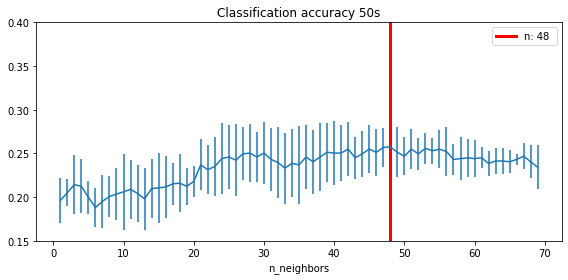

In [ ]:
# this is for 50s
tem_age = 5

tem_OTUs = select_OTUs[select_age_cat==tem_age]
tem_alco = select_alco[select_age_cat==tem_age]

scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

# Scree plot
x = [f'PC{i+1}' for i in range(n_pc)]
height = list(tem_pca.explained_variance_ratio_)
plt.bar(x, height)
plt.ylim(0,0.7)
plt.title('PCA explained variance (20s)')

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/PCA_variance_%d0s'%tem_age, dpi=300)
plt.clf()
plt.close()

# pair-wise pca

fig, ax = plt.subplots(ncols=n_pc, nrows=n_pc, constrained_layout=True, figsize=(28, 28))
fig.suptitle("pair-wised PCA")
for i in range(n_pc):
    for j in range(n_pc):
        if i == j:
            ax[i,j].text(0.45, 0.05, f'PC{i+1}')
            ax[i,j].text(0.05, 0.45, f'Other PCs', rotation=90)
        else:
            pcx = tem_pca_mat[:,i]
            pcy = tem_pca_mat[:,j]
            scalex = 1.0/(pcx.max() - pcx.min())
            scaley = 1.0/(pcy.max() - pcy.min())
            ax[i,j].scatter(pcx * scalex, pcy * scaley, alpha=0.1, color='black')
fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/PCA_%d0s'%tem_age, dpi=300)
plt.clf()
plt.close()

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_alco, stratify=tem_alco, test_size=0.3, random_state=4)

n_neighbors_list = range(1,70)
# The transformer computes the nearest neighbors graph using the maximum number
# of neighbors necessary in the grid search. The classifier model filters the
# nearest neighbors graph as required by its own n_neighbors parameter.
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list),
                                    mode='distance')
classifier_model = KNeighborsClassifier(metric='precomputed')

# Note that we give `memory` a directory to cache the graph computation
# that will be used several times when tuning the hyperparameters of the
# classifier.
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[('graph', graph_model), ('classifier', classifier_model)],
        memory=tmpdir)

    param_grid = {'classifier__n_neighbors': n_neighbors_list}
    grid_model_pca = GridSearchCV(full_model, param_grid)
    grid_model_pca.fit(X_train, y_train.astype('int'))

# Plot the results of the grid search.
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.errorbar(x=n_neighbors_list,
                 y=grid_model_pca.cv_results_['mean_test_score'],
                 yerr=grid_model_pca.cv_results_['std_test_score'])
axes.set(xlabel='n_neighbors', title='Classification accuracy %d0s'%tem_age)
axes.axvline(grid_model_pca.best_index_+1, color='red', linewidth=3,
                label='n: %d '%(grid_model_pca.best_index_+1))
axes.set_ylim(0.15,0.4)
fig.tight_layout()
axes.legend()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/alcho_fre_knn_pca_%d0s_new'%tem_age,dpi=300)
#plt.clf()
#plt.close()

print('best mean training accurace in cross validataion:\t',np.max(grid_model_pca.cv_results_['mean_test_score']))
model = KNeighborsClassifier(n_neighbors=(grid_model_pca.best_index_+1))
model.fit(X_train,y_train.astype('int'))
# test accuracy
model.score(X_test,y_test.astype('int'))

best mean training accurace in cross validataion:	 0.2347731888964116


0.23008849557522124

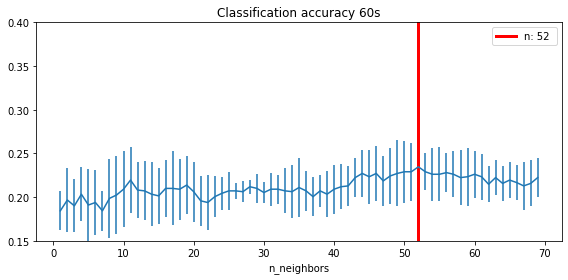

In [ ]:
# this is for 60s
tem_age = 6

tem_OTUs = select_OTUs[select_age_cat==tem_age]
tem_alco = select_alco[select_age_cat==tem_age]

scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

# Scree plot
x = [f'PC{i+1}' for i in range(n_pc)]
height = list(tem_pca.explained_variance_ratio_)
plt.bar(x, height)
plt.ylim(0,0.7)
plt.title('PCA explained variance (20s)')

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/PCA_variance_%d0s'%tem_age, dpi=300)
plt.clf()
plt.close()

# pair-wise pca

fig, ax = plt.subplots(ncols=n_pc, nrows=n_pc, constrained_layout=True, figsize=(28, 28))
fig.suptitle("pair-wised PCA")
for i in range(n_pc):
    for j in range(n_pc):
        if i == j:
            ax[i,j].text(0.45, 0.05, f'PC{i+1}')
            ax[i,j].text(0.05, 0.45, f'Other PCs', rotation=90)
        else:
            pcx = tem_pca_mat[:,i]
            pcy = tem_pca_mat[:,j]
            scalex = 1.0/(pcx.max() - pcx.min())
            scaley = 1.0/(pcy.max() - pcy.min())
            ax[i,j].scatter(pcx * scalex, pcy * scaley, alpha=0.1, color='black')
fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/PCA_%d0s'%tem_age, dpi=300)
plt.clf()
plt.close()

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_alco, stratify=tem_alco, test_size=0.3, random_state=15)

n_neighbors_list = range(1,70)
# The transformer computes the nearest neighbors graph using the maximum number
# of neighbors necessary in the grid search. The classifier model filters the
# nearest neighbors graph as required by its own n_neighbors parameter.
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list),
                                    mode='distance')
classifier_model = KNeighborsClassifier(metric='precomputed')

# Note that we give `memory` a directory to cache the graph computation
# that will be used several times when tuning the hyperparameters of the
# classifier.
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[('graph', graph_model), ('classifier', classifier_model)],
        memory=tmpdir)

    param_grid = {'classifier__n_neighbors': n_neighbors_list}
    grid_model_pca = GridSearchCV(full_model, param_grid)
    grid_model_pca.fit(X_train, y_train.astype('int'))

# Plot the results of the grid search.
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.errorbar(x=n_neighbors_list,
                 y=grid_model_pca.cv_results_['mean_test_score'],
                 yerr=grid_model_pca.cv_results_['std_test_score'])
axes.set(xlabel='n_neighbors', title='Classification accuracy %d0s'%tem_age)
axes.axvline(grid_model_pca.best_index_+1, color='red', linewidth=3,
                label='n: %d '%(grid_model_pca.best_index_+1))
axes.set_ylim(0.15,0.4)
fig.tight_layout()
axes.legend()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/alcho_fre_knn_pca_%d0s_new'%tem_age,dpi=300)
#plt.clf()
#plt.close()

print('best mean training accurace in cross validataion:\t',np.max(grid_model_pca.cv_results_['mean_test_score']))
model = KNeighborsClassifier(n_neighbors=(grid_model_pca.best_index_+1))
model.fit(X_train,y_train.astype('int'))
# test accuracy
model.score(X_test,y_test.astype('int'))

best mean training accurace in cross validataion:	 0.29626064420584963


0.2468354430379747

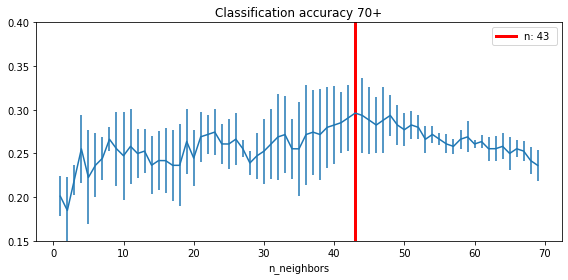

In [ ]:
# this is for 70s
tem_age = 7

tem_OTUs = select_OTUs[select_age_cat==tem_age]
tem_alco = select_alco[select_age_cat==tem_age]

scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

# Scree plot
x = [f'PC{i+1}' for i in range(n_pc)]
height = list(tem_pca.explained_variance_ratio_)
plt.bar(x, height)
plt.ylim(0,0.7)
plt.title('PCA explained variance (20s)')

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/PCA_variance_%d0s'%tem_age, dpi=300)
plt.clf()
plt.close()

# pair-wise pca

fig, ax = plt.subplots(ncols=n_pc, nrows=n_pc, constrained_layout=True, figsize=(28, 28))
fig.suptitle("pair-wised PCA")
for i in range(n_pc):
    for j in range(n_pc):
        if i == j:
            ax[i,j].text(0.45, 0.05, f'PC{i+1}')
            ax[i,j].text(0.05, 0.45, f'Other PCs', rotation=90)
        else:
            pcx = tem_pca_mat[:,i]
            pcy = tem_pca_mat[:,j]
            scalex = 1.0/(pcx.max() - pcx.min())
            scaley = 1.0/(pcy.max() - pcy.min())
            ax[i,j].scatter(pcx * scalex, pcy * scaley, alpha=0.1, color='black')
fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/PCA_%d0s'%tem_age, dpi=300)
plt.clf()
plt.close()

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)

n_neighbors_list = range(1,70)
# The transformer computes the nearest neighbors graph using the maximum number
# of neighbors necessary in the grid search. The classifier model filters the
# nearest neighbors graph as required by its own n_neighbors parameter.
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list),
                                    mode='distance')
classifier_model = KNeighborsClassifier(metric='precomputed')

# Note that we give `memory` a directory to cache the graph computation
# that will be used several times when tuning the hyperparameters of the
# classifier.
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[('graph', graph_model), ('classifier', classifier_model)],
        memory=tmpdir)

    param_grid = {'classifier__n_neighbors': n_neighbors_list}
    grid_model_pca = GridSearchCV(full_model, param_grid)
    grid_model_pca.fit(X_train, y_train.astype('int'))

# Plot the results of the grid search.
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.errorbar(x=n_neighbors_list,
                 y=grid_model_pca.cv_results_['mean_test_score'],
                 yerr=grid_model_pca.cv_results_['std_test_score'])
axes.set(xlabel='n_neighbors', title='Classification accuracy %d0+'%tem_age)
axes.axvline(grid_model_pca.best_index_+1, color='red', linewidth=3,
                label='n: %d '%(grid_model_pca.best_index_+1))
axes.set_ylim(0.15,0.4)
fig.tight_layout()
axes.legend()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/alcho_fre_knn_pca_%d0s_new'%tem_age,dpi=300)
#plt.clf()
#plt.close()

print('best mean training accurace in cross validataion:\t',np.max(grid_model_pca.cv_results_['mean_test_score']))
model = KNeighborsClassifier(n_neighbors=(grid_model_pca.best_index_+1))
model.fit(X_train,y_train.astype('int'))
# test accuracy
model.score(X_test,y_test.astype('int'))

###Classification using SVM

In [ ]:
from sklearn.svm import SVC 
from sklearn.model_selection import validation_curve

In [ ]:
# this is for all

tem_OTUs = select_OTUs
tem_alco = select_alco

scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)


# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train.astype('int')) 

cv_resutls= pd.DataFrame(grid.cv_results_)

fig,ax = plt.subplots(1,2,figsize=(10,4))

fig.suptitle('alcohol SVM classification for all')
ax[0].set_title('mean score in CV')
ax[1].set_title('std of scores in CV')
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','mean_test_score'),annot=True, ax=ax[0])
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','std_test_score'),annot=True, ax=ax[1])

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/alcho_fre_svm_pca_all',dpi=300)
#plt.clf()
#plt.close()

print(grid.best_params_)
# test score
grid.score(X_test,y_test.astype('int'))

{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


0.24709042076991944

In [ ]:
# this is for 20s
tem_age = 2

tem_OTUs = select_OTUs[select_age_cat==tem_age]
tem_alco = select_alco[select_age_cat==tem_age]

scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)


# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train.astype('int')) 

cv_resutls= pd.DataFrame(grid.cv_results_)

fig,ax = plt.subplots(1,2,figsize=(10,4))

fig.suptitle('alcohol SVM classification for %d0s'%tem_age)
ax[0].set_title('mean score in CV')
ax[1].set_title('std of scores in CV')
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','mean_test_score'),annot=True, ax=ax[0])
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','std_test_score'),annot=True, ax=ax[1])

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/alcho_fre_svm_pca_%d0s'%tem_age,dpi=300)
plt.clf()
plt.close()

print(grid.best_params_)
# test score
grid.score(X_test,y_test.astype('int'))

{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}


0.3532608695652174

In [ ]:
# this is for 30s
tem_age = 3

tem_OTUs = select_OTUs[select_age_cat==tem_age]
tem_alco = select_alco[select_age_cat==tem_age]

scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)


# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train.astype('int')) 

cv_resutls= pd.DataFrame(grid.cv_results_)

fig,ax = plt.subplots(1,2,figsize=(10,4))

fig.suptitle('alcohol SVM classification for %d0s'%tem_age)
ax[0].set_title('mean score in CV')
ax[1].set_title('std of scores in CV')
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','mean_test_score'),annot=True, ax=ax[0])
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','std_test_score'),annot=True, ax=ax[1])

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/alcho_fre_svm_pca_%d0s'%tem_age,dpi=300)
plt.clf()
plt.close()

print(grid.best_params_)
# test score
grid.score(X_test,y_test.astype('int'))

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


0.30279898218829515

In [ ]:
# this is for 40s
tem_age = 4

tem_OTUs = select_OTUs[select_age_cat==tem_age]
tem_alco = select_alco[select_age_cat==tem_age]

scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)


# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train.astype('int')) 

cv_resutls= pd.DataFrame(grid.cv_results_)

fig,ax = plt.subplots(1,2,figsize=(10,4))

fig.suptitle('alcohol SVM classification for %d0s'%tem_age)
ax[0].set_title('mean score in CV')
ax[1].set_title('std of scores in CV')
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','mean_test_score'),annot=True, ax=ax[0])
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','std_test_score'),annot=True, ax=ax[1])

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/alcho_fre_svm_pca_%d0s'%tem_age,dpi=300)
plt.clf()
plt.close()

print(grid.best_params_)
# test score
grid.score(X_test,y_test.astype('int'))

{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}


0.2590909090909091

In [ ]:
# this is for 50s
tem_age = 5

tem_OTUs = select_OTUs[select_age_cat==tem_age]
tem_alco = select_alco[select_age_cat==tem_age]

scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)


# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train.astype('int')) 

cv_resutls= pd.DataFrame(grid.cv_results_)

fig,ax = plt.subplots(1,2,figsize=(10,4))

fig.suptitle('alcohol SVM classification for %d0s'%tem_age)
ax[0].set_title('mean score in CV')
ax[1].set_title('std of scores in CV')
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','mean_test_score'),annot=True, ax=ax[0])
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','std_test_score'),annot=True, ax=ax[1])

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/alcho_fre_svm_pca_%d0s'%tem_age,dpi=300)
plt.clf()
plt.close()

print(grid.best_params_)
# test score
grid.score(X_test,y_test.astype('int'))

{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}


0.23789473684210527

In [ ]:
# this is for 60s
tem_age = 6

tem_OTUs = select_OTUs[select_age_cat==tem_age]
tem_alco = select_alco[select_age_cat==tem_age]

scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)


# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train.astype('int')) 

cv_resutls= pd.DataFrame(grid.cv_results_)

fig,ax = plt.subplots(1,2,figsize=(10,4))

fig.suptitle('alcohol SVM classification for %d0s'%tem_age)
ax[0].set_title('mean score in CV')
ax[1].set_title('std of scores in CV')
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','mean_test_score'),annot=True, ax=ax[0])
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','std_test_score'),annot=True, ax=ax[1])

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/alcho_fre_svm_pca_%d0s'%tem_age,dpi=300)
plt.clf()
plt.close()

print(grid.best_params_)
# test score
grid.score(X_test,y_test.astype('int'))

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


0.25

In [ ]:
# this is for 70s
tem_age = 7

tem_OTUs = select_OTUs[select_age_cat==tem_age]
tem_alco = select_alco[select_age_cat==tem_age]

scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)


# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train.astype('int')) 

cv_resutls= pd.DataFrame(grid.cv_results_)

fig,ax = plt.subplots(1,2,figsize=(10,4))

fig.suptitle('alcohol SVM classification for %d0+'%tem_age)
ax[0].set_title('mean score in CV')
ax[1].set_title('std of scores in CV')
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','mean_test_score'),annot=True, ax=ax[0])
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','std_test_score'),annot=True, ax=ax[1])

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/alcho_fre_svm_pca_%d0s'%tem_age,dpi=300)
plt.clf()
plt.close()

print(grid.best_params_)
# test score
grid.score(X_test,y_test.astype('int'))

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


0.26582278481012656

##Classifcation for BMI catogory

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
select_OTUs_male = select_OTUs[select_sex==1]
select_OTUs_female = select_OTUs[select_sex==2]

select_age_cat_male = select_age_cat[select_sex==1]
select_age_cat_female = select_age_cat[select_sex==2]

select_bmi_cat_male = select_bmi_cat[select_sex==1]
select_bmi_cat_female = select_bmi_cat[select_sex==2]

for i in range(0,8):
    print(i, select_OTUs_male[select_age_cat_male==i,].shape)

print('female')
for i in range(0,8):
    print(i, select_OTUs_female[select_age_cat_female==i,].shape)

0 (160, 4106)
1 (94, 4106)
2 (274, 4106)
3 (614, 4106)
4 (650, 4106)
5 (648, 4106)
6 (646, 4106)
7 (282, 4106)
female
0 (111, 4106)
1 (83, 4106)
2 (337, 4106)
3 (692, 4106)
4 (815, 4106)
5 (933, 4106)
6 (858, 4106)
7 (243, 4106)


In [ ]:
# this is for people>20s

tem_OTUs = select_OTUs[select_age_cat>=2]
tem_bmi_cat = select_bmi_cat[select_age_cat>=2]

X_train, X_test, y_train, y_test = train_test_split(tem_OTUs, tem_bmi_cat, stratify=tem_bmi_cat, test_size=0.3, random_state=42)

param_grid = {'solver': ['svd']}  
grid = GridSearchCV(LinearDiscriminantAnalysis(), param_grid, refit = True, verbose = 1)
grid.fit(X_train, y_train.astype('int')) 


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='deprecated', n_jobs=None, param_grid={'solver': ['svd']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
grid.cv_results_['std_test_score']

array([0.01095207])

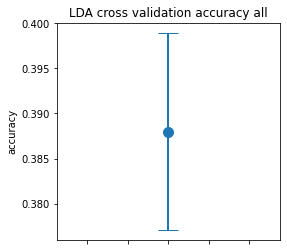

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(4, 4))
axes.errorbar(x=1,
              y=grid.cv_results_['mean_test_score'],
              yerr=grid.cv_results_['std_test_score'],
              elinewidth=2,barsabove=True, marker='.', markersize=20, capsize=10)
axes.set_title('LDA validation accuracy all')
axes.set_xticklabels([])
axes.set_ylabel('accuracy')

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/bmi_cat_all_LDA',dpi=300)

In [ ]:
grid.score(X_test,y_test.astype('int'))

0.4116245831348261

In [ ]:
grid.cv_results_

{'mean_fit_time': array([30.45454941]),
 'mean_score_time': array([0.00814648]),
 'mean_test_score': array([0.38799566]),
 'param_solver': masked_array(data=['svd'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'solver': 'svd'}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.38265306]),
 'split1_test_score': array([0.37857143]),
 'split2_test_score': array([0.37691522]),
 'split3_test_score': array([0.40449438]),
 'split4_test_score': array([0.39734423]),
 'std_fit_time': array([0.11866857]),
 'std_score_time': array([0.00013526]),
 'std_test_score': array([0.01095207])}

In [ ]:
scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_bmi_cat, stratify=tem_bmi_cat, test_size=0.3, random_state=42)


# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train.astype('int')) 

cv_resutls= pd.DataFrame(grid.cv_results_)

fig,ax = plt.subplots(1,2,figsize=(10,4))

fig.suptitle('bmi SVM classification')
ax[0].set_title('mean score in CV')
ax[1].set_title('std of scores in CV')
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','mean_test_score'),annot=True, ax=ax[0])
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','std_test_score'),annot=True, ax=ax[1])

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/bmi_cat_all_svm')
plt.clf()
plt.close()

print(grid.best_params_)
# test score
grid.score(X_test,y_test.astype('int'))

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


0.606955693187232

In [ ]:
grid.score(X_test,y_test.astype('int'))

0.606955693187232

###male classfication

In [ ]:
# this is for male children

tem_OTUs = select_OTUs_male[select_age_cat_male==0]
tem_bmi_cat = select_bmi_cat_male[select_age_cat_male==0]

In [ ]:
tem_OTUs.shape

(160, 4106)

In [ ]:
tem_bmi_cat

array([4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4,
       4, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 1, 4, 1, 4, 1, 1, 4, 1,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4,
       4, 1, 4, 4, 4, 1, 2, 1, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4,
       1, 1, 4, 4, 4, 4], dtype=object)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tem_OTUs, tem_bmi_cat, stratify=tem_bmi_cat, test_size=0.3, random_state=42)

param_grid = {'shrinkage': np.linespace(0,1,10),
              'solver': ['lsqr']}  
grid = GridSearchCV(LinearDiscriminantAnalysis(), param_grid, refit = True, verbose = 1)
# fitting the model for grid search 
grid.fit(X_train, y_train.astype('int')) 

cv_resutls= pd.DataFrame(grid.cv_results_)

ValueError: ignored

In [ ]:
# this is for people>20s

tem_OTUs = select_OTUs_male[select_age_cat_male>=2]
tem_bmi_cat = select_bmi_cat_male[select_age_cat_male>=2]

X_train, X_test, y_train, y_test = train_test_split(tem_OTUs, tem_bmi_cat, stratify=tem_bmi_cat, test_size=0.3, random_state=42)

param_grid = {'solver': ['svd']}  
grid = GridSearchCV(LinearDiscriminantAnalysis(), param_grid, refit = True, verbose = 1)
grid.fit(X_train, y_train.astype('int')) 


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   33.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='deprecated', n_jobs=None, param_grid={'solver': ['svd']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
grid.cv_results_['std_test_score']

array([0.05315628])

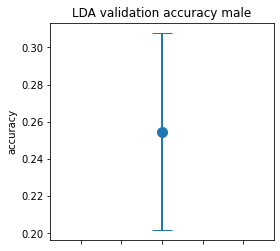

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(4, 4))
axes.errorbar(x=1,
              y=grid.cv_results_['mean_test_score'],
              yerr=grid.cv_results_['std_test_score'],
              elinewidth=2,barsabove=True, marker='.', markersize=20, capsize=10)
axes.set_title('LDA validation accuracy male')
axes.set_xticklabels([])
axes.set_ylabel('accuracy')

fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/bmi_cat_male_LDA',dpi=300)

In [ ]:
grid.score(X_test,y_test.astype('int'))

0.29518716577540105

In [ ]:
scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_bmi_cat, stratify=tem_bmi_cat, test_size=0.3, random_state=42)


# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train.astype('int')) 

cv_resutls= pd.DataFrame(grid.cv_results_)

fig,ax = plt.subplots(1,2,figsize=(10,4))

fig.suptitle('bmi SVM classification male')
ax[0].set_title('mean score in CV')
ax[1].set_title('std of scores in CV')
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','mean_test_score'),annot=True, ax=ax[0])
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','std_test_score'),annot=True, ax=ax[1])

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/bmi_cat_male_svm')
plt.clf()
plt.close()

print(grid.best_params_)
# test score
grid.score(X_test,y_test.astype('int'))

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


0.5540106951871657

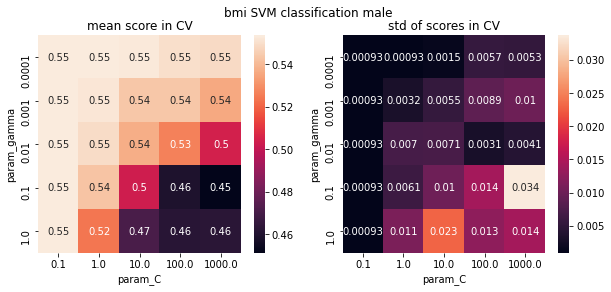

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,4))

fig.suptitle('bmi SVM classification male')
ax[0].set_title('mean score in CV')
ax[1].set_title('std of scores in CV')
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','mean_test_score'),annot=True, ax=ax[0])
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','std_test_score'),annot=True, ax=ax[1])
fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/bmi_cat_male_SVM')

0.992198256080771

###female classfication


In [ ]:
# this is for male children

tem_OTUs = select_OTUs_female[select_age_cat_female==0]
tem_bmi_cat = select_bmi_cat_female[select_age_cat_female==0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tem_OTUs, tem_bmi_cat, stratify=tem_bmi_cat, test_size=0.3, random_state=42)


ValueError: ignored

In [ ]:
# this is for people>20s

tem_OTUs = select_OTUs_female[select_age_cat_female>=2]
tem_bmi_cat = select_bmi_cat_female[select_age_cat_female>=2]

X_train, X_test, y_train, y_test = train_test_split(tem_OTUs, tem_bmi_cat, stratify=tem_bmi_cat, test_size=0.3, random_state=42)

param_grid = {'solver': ['svd']}  
grid = GridSearchCV(LinearDiscriminantAnalysis(), param_grid, refit = True, verbose = 1)
grid.fit(X_train, y_train.astype('int')) 


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   50.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='deprecated', n_jobs=None, param_grid={'solver': ['svd']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

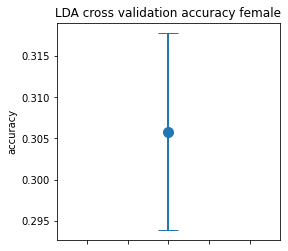

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(4, 4))
axes.errorbar(x=1,
              y=grid.cv_results_['mean_test_score'],
              yerr=grid.cv_results_['std_test_score'],
              elinewidth=2,barsabove=True, marker='.', markersize=20, capsize=10)
axes.set_title('LDA validation accuracy female')
axes.set_xticklabels([])
axes.set_ylabel('accuracy')

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/bmi_cat_female_LDA',dpi=300)

In [ ]:
grid.cv_results_

{'mean_fit_time': array([10.17959929]),
 'mean_score_time': array([0.00485535]),
 'mean_test_score': array([0.30582795]),
 'param_solver': masked_array(data=['svd'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'solver': 'svd'}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.29097606]),
 'split1_test_score': array([0.29834254]),
 'split2_test_score': array([0.30018416]),
 'split3_test_score': array([0.31675875]),
 'split4_test_score': array([0.32287823]),
 'std_fit_time': array([0.06930025]),
 'std_score_time': array([5.37984326e-05]),
 'std_test_score': array([0.0119888])}

In [ ]:
grid.score(X_test,y_test.astype('int'))

0.35223367697594504

In [ ]:
scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_bmi_cat, stratify=tem_bmi_cat, test_size=0.3, random_state=42)


# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train.astype('int')) 

cv_resutls= pd.DataFrame(grid.cv_results_)

plt.clf()
plt.close()
fig,ax = plt.subplots(1,2,figsize=(10,4))

fig.suptitle('bmi SVM classification female')
ax[0].set_title('mean score in CV')
ax[1].set_title('std of scores in CV')
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','mean_test_score'),annot=True, ax=ax[0])
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','std_test_score'),annot=True, ax=ax[1])

fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/bmi_cat_female_svm')
plt.clf()
plt.close()

print(grid.best_params_)
# test score
grid.score(X_test,y_test.astype('int'))

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


0.6494845360824743

In [ ]:
'/content/drive/MyDrive/class/STAT542/project/zewei'

In [ ]:
#Regression


# Regression


##Lasso regression without using PCA, two kinds of model selection method:  
1. ACI and BCI
2. cross-vaidation

It seems that we get poor resutls, we could estimate BMI by mean value.

In [ ]:
f = open('/content/drive/MyDrive/class/STAT542/project/OUT_all_provided/provided_OTU_names.txt', 'r')
OTU_names = f.read().split('\n')
f.close()
OTU_names = sorted(OTU_names)

In [ ]:
len(OTU_names)

32955

In [ ]:
OTU_names[0]

''

In [ ]:
select_name = []

for i in range(len(OTU_names)):
    if OTU_names[i].endswith('unspecified'):
        select_name.append(OTU_names[i])
    elif 'unspecified' not in OTU_names[i]:
        select_name.append(OTU_names[i])
len(select_name)

4107

In [ ]:
select_name = select_name[1:]

In [ ]:
# lasso regression
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

In [ ]:
select_OTUs_male = select_OTUs[select_sex==1]
select_OTUs_female = select_OTUs[select_sex==2]

select_age_cat_male = select_age_cat[select_sex==1]
select_age_cat_female = select_age_cat[select_sex==2]

select_BMI_male = select_BMI[select_sex==1]
select_BMI_female = select_BMI[select_sex==2]

for i in range(0,8):
    print(i, select_OTUs_male[select_age_cat_male==i,].shape)

print('female')
for i in range(0,8):
    print(i, select_OTUs_female[select_age_cat_female==i,].shape)

0 (160, 4106)
1 (94, 4106)
2 (274, 4106)
3 (614, 4106)
4 (650, 4106)
5 (648, 4106)
6 (646, 4106)
7 (282, 4106)
female
0 (111, 4106)
1 (83, 4106)
2 (337, 4106)
3 (692, 4106)
4 (815, 4106)
5 (933, 4106)
6 (858, 4106)
7 (243, 4106)


In [ ]:
# this is for people>20s

tem_OTUs = select_OTUs_male[select_age_cat_male>=2]
tem_BMI = select_BMI_male[select_age_cat_male>=2]

X_train, X_test, y_train, y_test = train_test_split(tem_OTUs, tem_BMI, test_size=0.3, random_state=42)


Computing regularization path using the Lars lasso...


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:608: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 432 iterations, alpha=2.021e-03, previous alpha=2.021e-03, with an active set of 429 regressors.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:608: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 16 iterations, alpha=5.802e-03, previous alpha=5.795e-03, with an active set of 17 regressors.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:608: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 22 iterations, alpha=5.632e-03, previous alpha=5.631e-03, with an active set of 23 regressors.
  ConvergenceWa

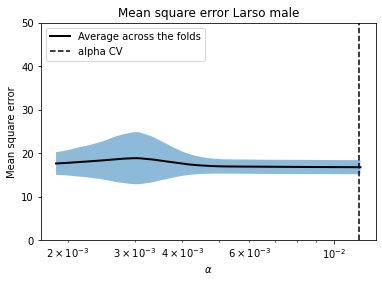

In [ ]:
# LassoLarsCV: least angle regression

# Compute paths
print("Computing regularization path using the Lars lasso...")
t1 = time.time()
model = LassoLarsCV(cv=10,fit_intercept=True,max_iter=1000,eps=0.1).fit(X_train, y_train)
t_lasso_lars_cv = time.time() - t1

# Display results
plt.figure()
#plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_, ':')
#plt.errorbar(x=model.cv_alphas_+ EPSILON,
#                 y=model.mse_path_.mean(axis=-1),
#                 yerr=model.mse_path_.std(axis=-1))
plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_.mean(axis=-1), 'k',
             label='Average across the folds', linewidth=2)

plt.fill_between(model.cv_alphas_+ EPSILON, 
                 model.mse_path_.mean(axis=-1)-model.mse_path_.std(axis=-1), 
                 model.mse_path_.mean(axis=-1)+model.mse_path_.std(axis=-1), 
                 alpha=0.5)

plt.axvline(model.alpha_, linestyle='--', color='k',
            label='alpha CV')
plt.legend()

plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square error')
plt.title('Mean square error Larso male')
plt.axis('tight')
plt.ylim(0, 50)

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/Mean_square_error_Larso_male')

In [ ]:
# regression results
lasso_select_name = []
print('coeffcient:\tselect varaican:')
for i in range(len(model.coef_)):
    if model.coef_[i] != 0:
        lasso_select_name.append(select_name[i])
        print('%f\t%s'%(model.coef_[i], select_name[i]))

coeffcient:	select varaican:


In [ ]:
model.score(X_train,y_train)

0.0

In [ ]:
model.score(X_test,y_test)

-0.0013380971519227902

In [ ]:
# MSE for training set
np.mean((model.predict(X_train)-y_train)*(model.predict(X_train)-y_train))

16.72610663787444

In [ ]:
# MSE for testing set
np.mean((model.predict(X_test)-y_test)*(model.predict(X_test)-y_test))

17.11745603813109

In [ ]:
# this is for people>20s

tem_OTUs = select_OTUs_female[select_age_cat_female>=2]
tem_BMI = select_BMI_female[select_age_cat_female>=2]

X_train, X_test, y_train, y_test = train_test_split(tem_OTUs, tem_BMI, test_size=0.3, random_state=42)


Computing regularization path using the Lars lasso...


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:608: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 75 iterations, alpha=3.982e-03, previous alpha=3.980e-03, with an active set of 76 regressors.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:608: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 49 iterations, alpha=4.687e-03, previous alpha=4.674e-03, with an active set of 50 regressors.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:608: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 15 iterations, alpha=5.805e-03, previous alpha=5.792e-03, with an active set of 16 regressors.
  ConvergenceWarn

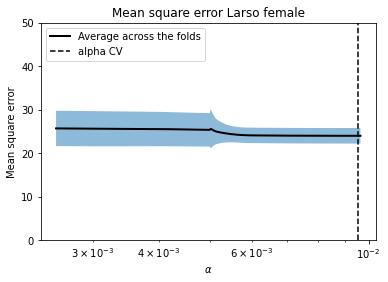

In [ ]:
# LassoLarsCV: least angle regression

# Compute paths
print("Computing regularization path using the Lars lasso...")
t1 = time.time()
model = LassoLarsCV(cv=10,fit_intercept=True,max_iter=1000,eps=0.1).fit(X_train, y_train)
t_lasso_lars_cv = time.time() - t1

# Display results
plt.figure()
#plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_, ':')
#plt.errorbar(x=model.cv_alphas_+ EPSILON,
#                 y=model.mse_path_.mean(axis=-1),
#                 yerr=model.mse_path_.std(axis=-1))
plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_.mean(axis=-1), 'k',
             label='Average across the folds', linewidth=2)

plt.fill_between(model.cv_alphas_+ EPSILON, 
                 model.mse_path_.mean(axis=-1)-model.mse_path_.std(axis=-1), 
                 model.mse_path_.mean(axis=-1)+model.mse_path_.std(axis=-1), 
                 alpha=0.5)

plt.axvline(model.alpha_, linestyle='--', color='k',
            label='alpha CV')
plt.legend()

plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square error')
plt.title('Mean square error Larso female')
plt.axis('tight')
plt.ylim(0, 50)

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/Mean_square_error_Larso_female')

In [ ]:
model.score(X_train,y_train)

0.0

In [ ]:
model.score(X_test,y_test)

-0.0014533466108055393

In [ ]:
# MSE for training set
np.mean((model.predict(X_train)-y_train)*(model.predict(X_train)-y_train))

23.957588659474144

In [ ]:
# MSE for testing set
np.mean((model.predict(X_test)-y_test)*(model.predict(X_test)-y_test))

27.353994718302285

In [ ]:
# regression results
lasso_select_name = []
print('coeffcient:\tselect varaican:')
for i in range(len(model.coef_)):
    if model.coef_[i] != 0:
        lasso_select_name.append(select_name[i])
        print('%f\t%s'%(model.coef_[i], select_name[i]))

coeffcient:	select varaican:


## Using PCA for model regression




In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

In [ ]:
select_OTUs_male = select_OTUs[select_sex==1]
select_OTUs_female = select_OTUs[select_sex==2]

select_age_cat_male = select_age_cat[select_sex==1]
select_age_cat_female = select_age_cat[select_sex==2]

select_BMI_male = select_BMI[select_sex==1]
select_BMI_female = select_BMI[select_sex==2]

for i in range(0,8):
    print(i, select_OTUs_male[select_age_cat_male==i,].shape)

print('female')
for i in range(0,8):
    print(i, select_OTUs_female[select_age_cat_female==i,].shape)

0 (160, 4106)
1 (94, 4106)
2 (274, 4106)
3 (614, 4106)
4 (650, 4106)
5 (648, 4106)
6 (646, 4106)
7 (282, 4106)
female
0 (111, 4106)
1 (83, 4106)
2 (337, 4106)
3 (692, 4106)
4 (815, 4106)
5 (933, 4106)
6 (858, 4106)
7 (243, 4106)


In [ ]:
tem_OTUs = select_OTUs_male[select_age_cat_male>=2]
tem_BMI = select_BMI_male[select_age_cat_male>=2]

In [ ]:
# scale for PCA

scaler = StandardScaler()
scaler.fit(tem_OTUs)
OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

In [ ]:
# PCA
n_pc = 10
pca = PCA(n_components=n_pc)
pca_mat = pca.fit_transform(OTUs_scale)    # project the original data into the PCA space

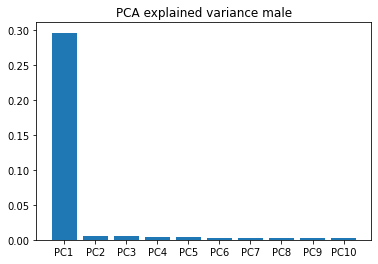

In [ ]:
# Scree plot
x = [f'PC{i+1}' for i in range(n_pc)]
height = list(pca.explained_variance_ratio_)
plt.bar(x, height)
plt.title('PCA explained variance male')
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/PCA_variance_male',dpi=300)

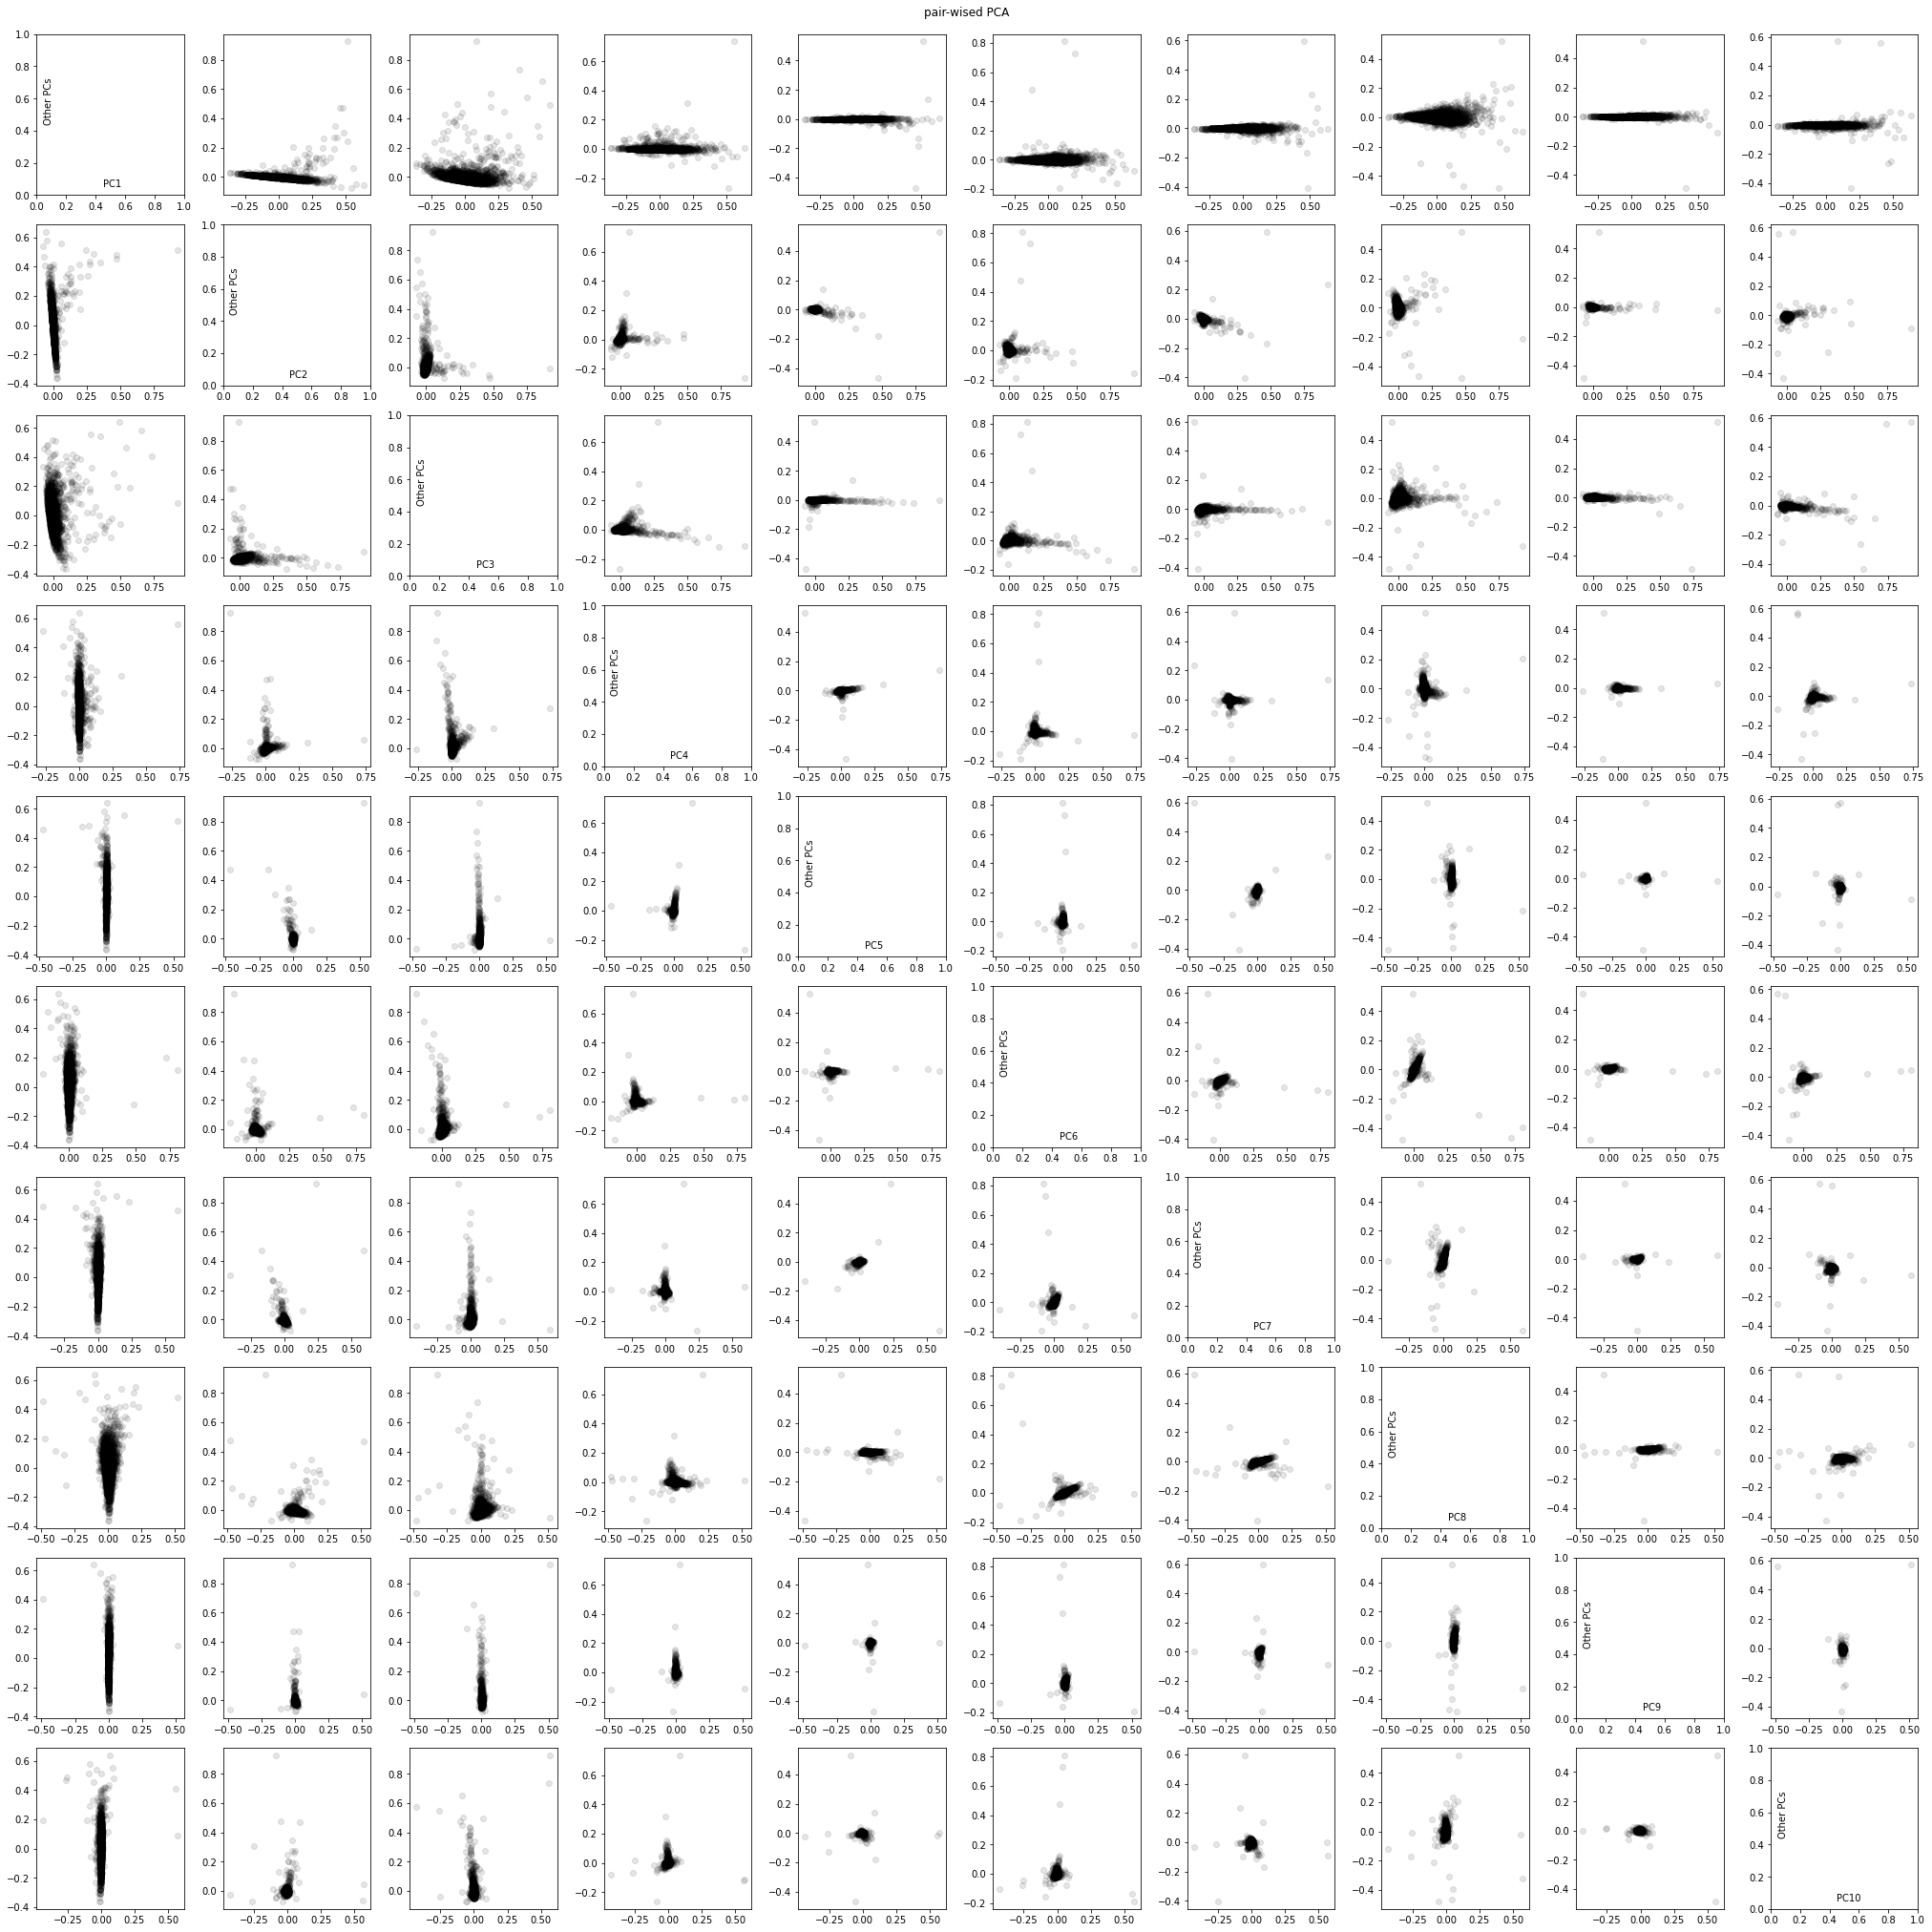

In [ ]:
# pair-wise pca

fig, ax = plt.subplots(ncols=n_pc, nrows=n_pc, constrained_layout=True, figsize=(28, 28))
fig.suptitle("pair-wised PCA")
for i in range(n_pc):
    for j in range(n_pc):
        if i == j:
            ax[i,j].text(0.45, 0.05, f'PC{i+1}')
            ax[i,j].text(0.05, 0.45, f'Other PCs', rotation=90)
        else:
            pcx = pca_mat[:,i]
            pcy = pca_mat[:,j]
            scalex = 1.0/(pcx.max() - pcx.min())
            scaley = 1.0/(pcy.max() - pcy.min())
            ax[i,j].scatter(pcx * scalex, pcy * scaley, alpha=0.1, color='black')
fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/PCA_male', dpi=300)

In [ ]:
pca_mat_train, pca_mat_test, BMI_train, BMI_test = train_test_split(pca_mat, tem_BMI, test_size=0.3)

In [ ]:
n = len(pca_mat_train)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=2)

regr = LinearRegression()
mse = []
mse_std = []

In [ ]:
score = -1*cross_val_score(regr, np.ones((n,1)), BMI_train, cv=kf_10, scoring='neg_mean_squared_error')
mse_std.append(score.std())
mse.append(score.mean()) 

for i in np.arange(1,11):
    score = -1*cross_val_score(regr, pca_mat_train[:,:i], BMI_train, cv=kf_10, scoring='neg_mean_squared_error')
    mse_std.append(score.std())
    mse.append(score.mean()) 

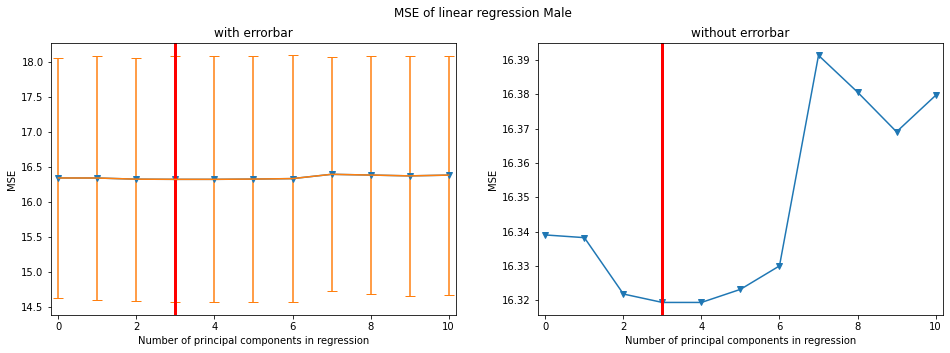

In [ ]:


fig, ax = plt.subplots(1,2, figsize=(16,5))
ax[0].plot(mse, '-v')
ax[0].errorbar(x=np.arange(11),
             y=mse,
             yerr=mse_std,
             capsize=5)
ax[0].set_xlabel('Number of principal components in regression')
ax[0].set_ylabel('MSE')
ax[0].set_xlim((-0.2,10.2))

ax[1].plot(mse, '-v')

ax[1].set_xlabel('Number of principal components in regression')
ax[1].set_ylabel('MSE')
ax[1].set_xlim((-0.2,10.2))

ax[0].set_title('with errorbar')
ax[1].set_title('without errorbar')

ax[1].axvline(3, color='red', linewidth=3,
             label='n: %d '%(grid_model_pca.best_index_+1))
ax[0].axvline(3, color='red', linewidth=3,
             label='n: %d '%(grid_model_pca.best_index_+1))
fig.suptitle('MSE of linear regression Male')

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/PCA_linear_male')

In [ ]:
mse

[16.3390122490949,
 16.338226342720482,
 16.321812641972482,
 16.319359684604898,
 16.31936180753021,
 16.32317195255435,
 16.330001623265133,
 16.391296796944513,
 16.38059252782573,
 16.369036659634858,
 16.379619934992455]

In [ ]:
linear_regression = LinearRegression().fit(pca_mat_train[:,:3], BMI_train)

In [ ]:
np.mean((linear_regression.predict(pca_mat_test[:,:3])-BMI_test)*(linear_regression.predict(pca_mat_test[:,:3])-BMI_test))

18.06239224382197

In [ ]:
np.mean((linear_regression.predict(pca_mat_train[:,:3])-BMI_train)*(linear_regression.predict(pca_mat_train[:,:3])-BMI_train))

16.274704953618446

In [ ]:
tem_OTUs = select_OTUs_female[select_age_cat_female>=2]
tem_BMI = select_BMI_female[select_age_cat_female>=2]

In [ ]:
# scale for PCA

scaler = StandardScaler()
scaler.fit(tem_OTUs)
OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

In [ ]:
# PCA
n_pc = 10
pca = PCA(n_components=n_pc)
pca_mat = pca.fit_transform(OTUs_scale)    # project the original data into the PCA space

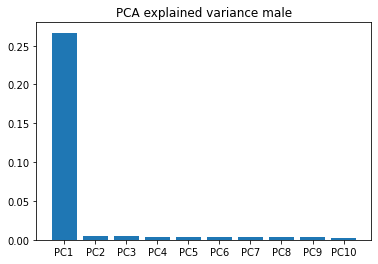

In [ ]:
# Scree plot
x = [f'PC{i+1}' for i in range(n_pc)]
height = list(pca.explained_variance_ratio_)
plt.bar(x, height)
plt.title('PCA explained variance male')
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/PCA_variance_female',dpi=300)

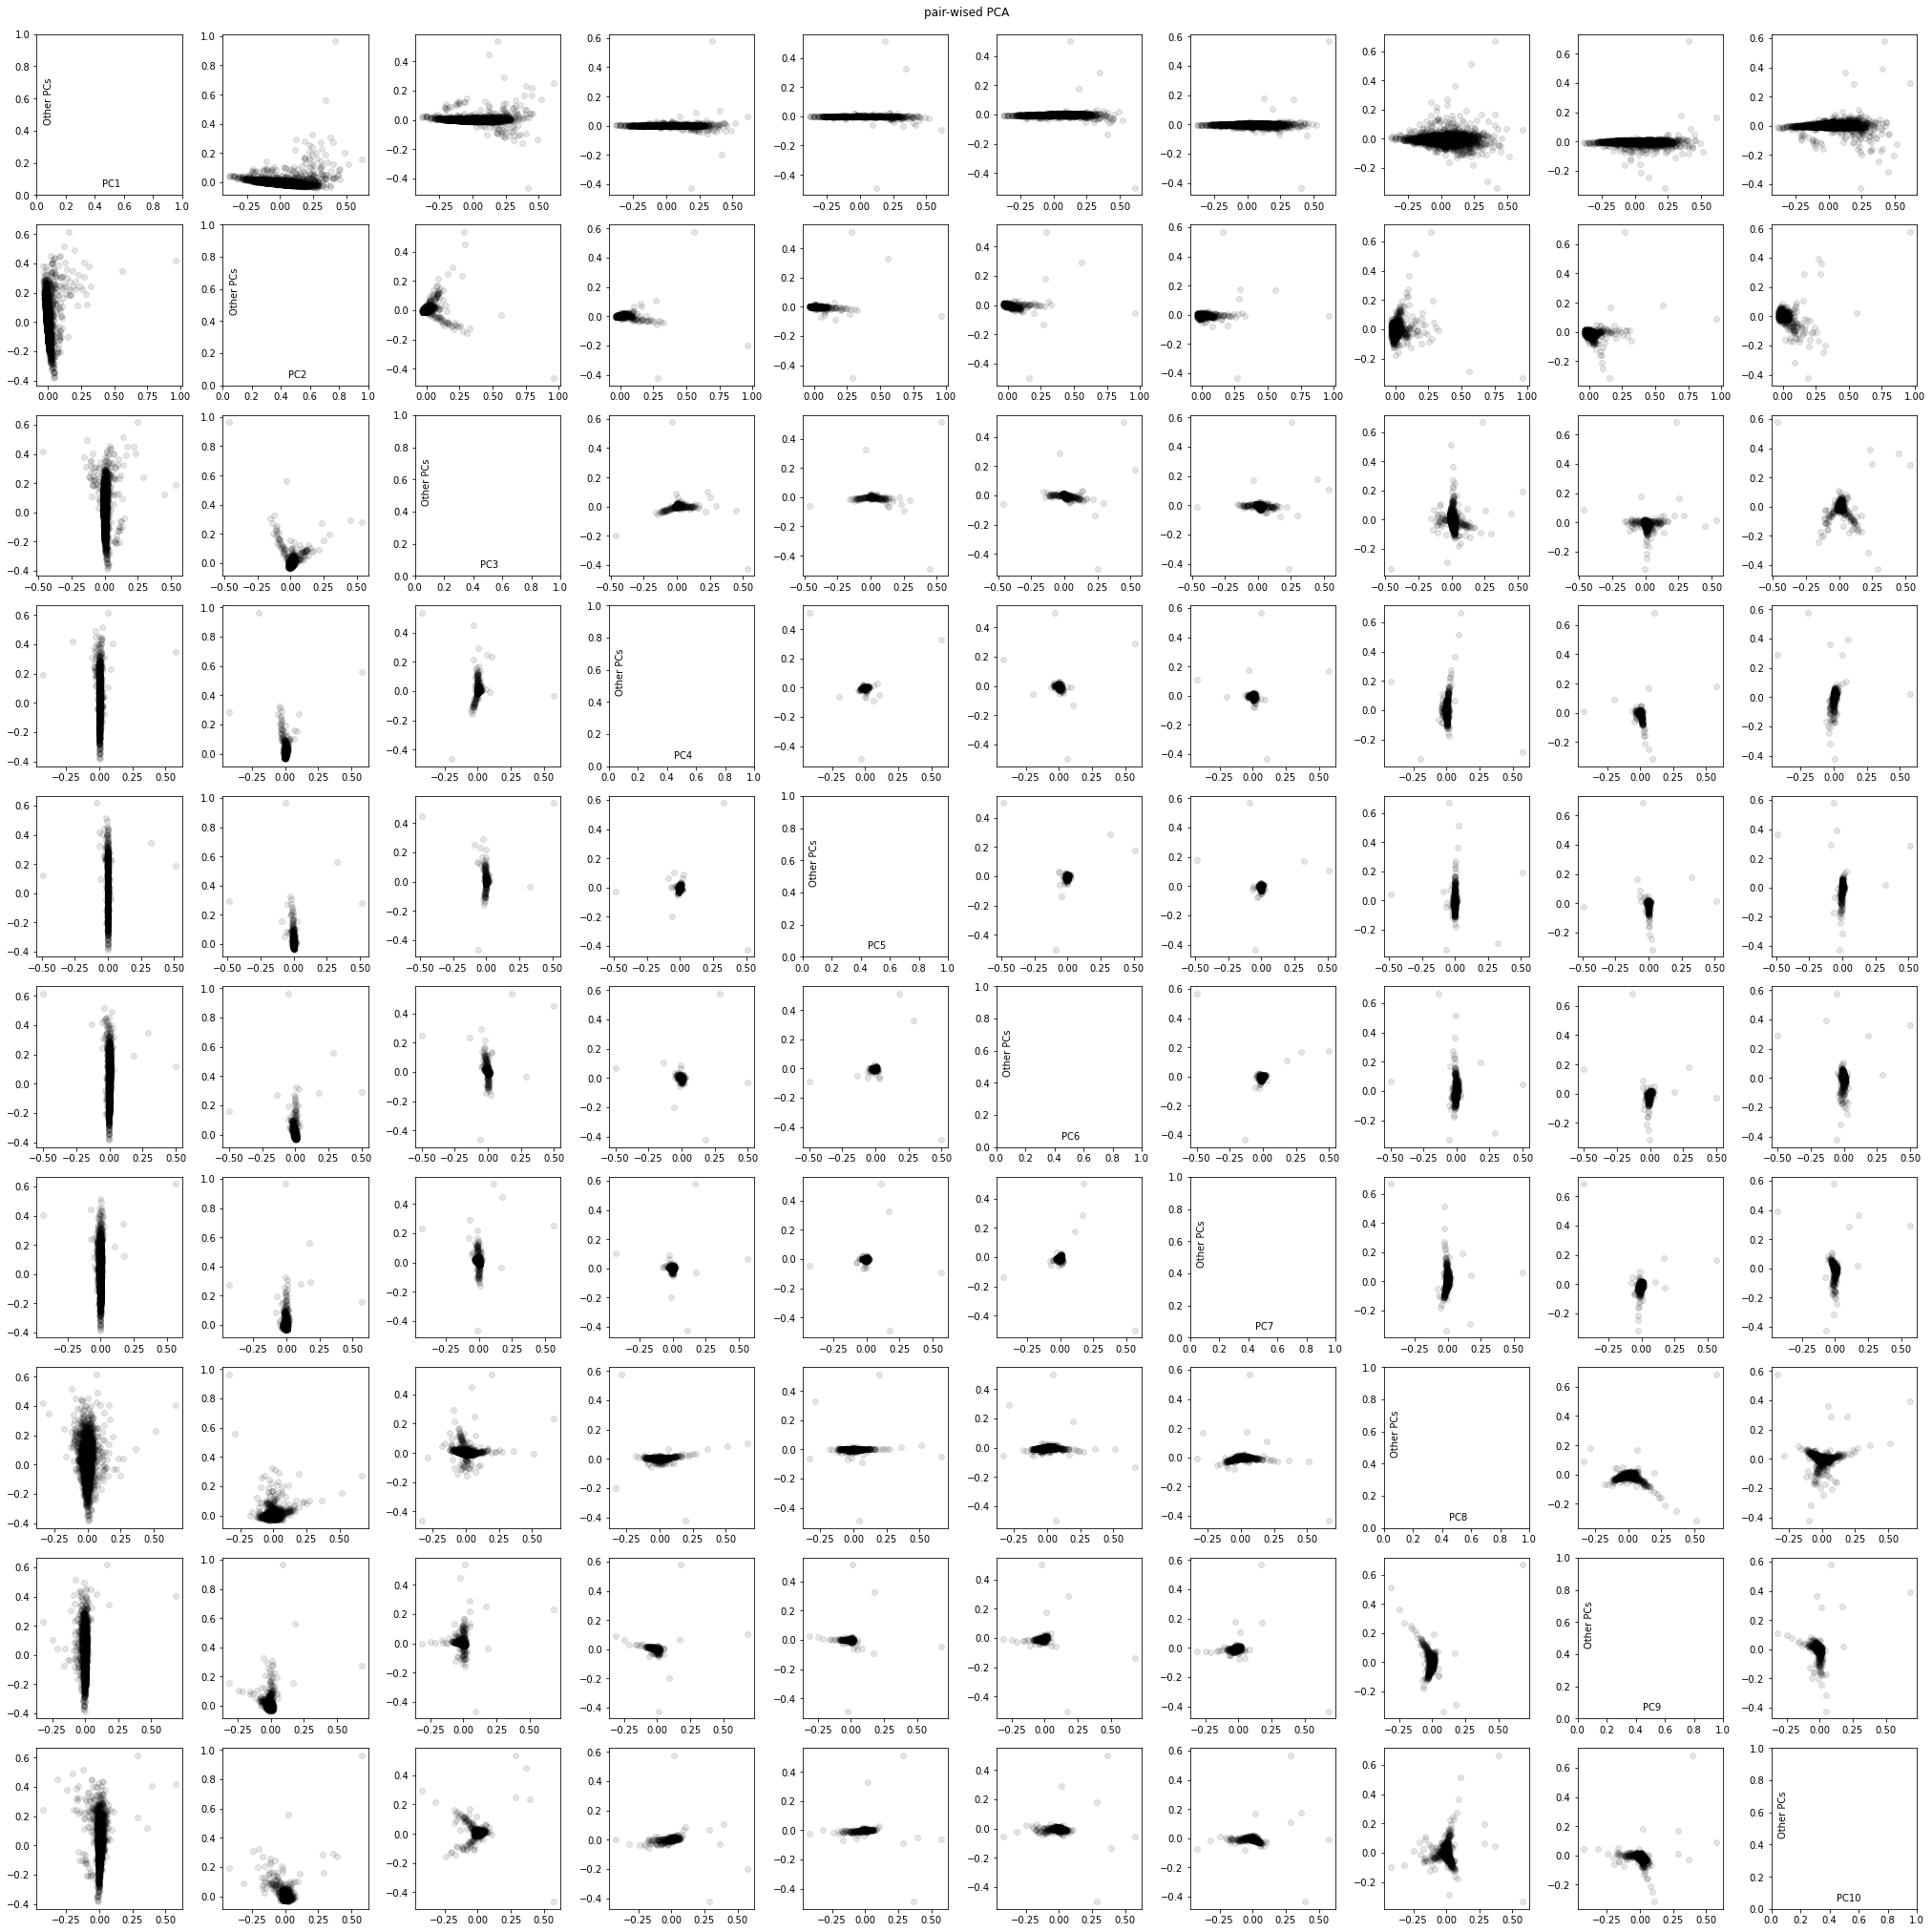

In [ ]:
# pair-wise pca

fig, ax = plt.subplots(ncols=n_pc, nrows=n_pc, constrained_layout=True, figsize=(28, 28))
fig.suptitle("pair-wised PCA")
for i in range(n_pc):
    for j in range(n_pc):
        if i == j:
            ax[i,j].text(0.45, 0.05, f'PC{i+1}')
            ax[i,j].text(0.05, 0.45, f'Other PCs', rotation=90)
        else:
            pcx = pca_mat[:,i]
            pcy = pca_mat[:,j]
            scalex = 1.0/(pcx.max() - pcx.min())
            scaley = 1.0/(pcy.max() - pcy.min())
            ax[i,j].scatter(pcx * scalex, pcy * scaley, alpha=0.1, color='black')
fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/PCA_female', dpi=300)

In [ ]:
pca_mat_train, pca_mat_test, BMI_train, BMI_test = train_test_split(pca_mat, tem_BMI, test_size=0.3)

In [ ]:
n = len(pca_mat_train)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=2)

regr = LinearRegression()
mse = []
mse_std = []

In [ ]:
score = -1*cross_val_score(regr, np.ones((n,1)), BMI_train, cv=kf_10, scoring='neg_mean_squared_error')
mse_std.append(score.std())
mse.append(score.mean()) 

for i in np.arange(1,11):
    score = -1*cross_val_score(regr, pca_mat_train[:,:i], BMI_train, cv=kf_10, scoring='neg_mean_squared_error')
    mse_std.append(score.std())
    mse.append(score.mean()) 

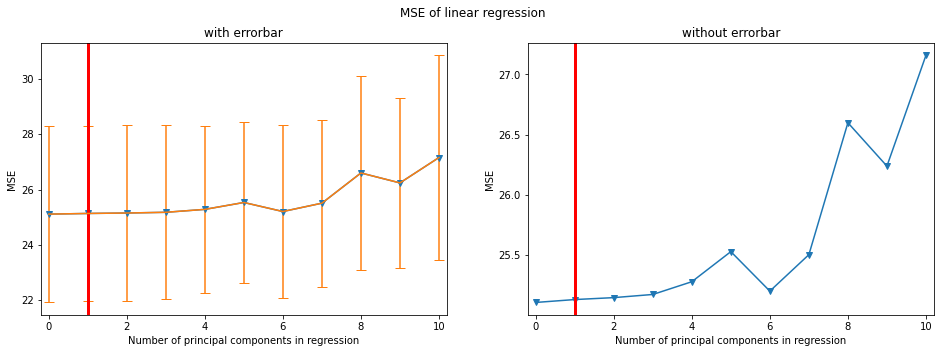

In [ ]:


fig, ax = plt.subplots(1,2, figsize=(16,5))
ax[0].plot(mse, '-v')
ax[0].errorbar(x=np.arange(11),
             y=mse,
             yerr=mse_std,
             capsize=5)
ax[0].set_xlabel('Number of principal components in regression')
ax[0].set_ylabel('MSE')
ax[0].set_xlim((-0.2,10.2))

ax[1].plot(mse, '-v')

ax[1].set_xlabel('Number of principal components in regression')
ax[1].set_ylabel('MSE')
ax[1].set_xlim((-0.2,10.2))

ax[0].set_title('with errorbar')
ax[1].set_title('without errorbar')

ax[1].axvline(1, color='red', linewidth=3,
             label='n: %d '%(grid_model_pca.best_index_+1))
ax[0].axvline(1, color='red', linewidth=3,
             label='n: %d '%(grid_model_pca.best_index_+1))
fig.suptitle('MSE of linear regression')

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/PCA_linear_female')

In [ ]:
linear_regression = LinearRegression().fit(pca_mat_train[:,:1], BMI_train)

In [ ]:
np.mean((linear_regression.predict(pca_mat_test[:,:1])-BMI_test)*(linear_regression.predict(pca_mat_test[:,:1])-BMI_test))

24.544484736223783

In [ ]:
np.mean((linear_regression.predict(pca_mat_train[:,:1])-BMI_train)*(linear_regression.predict(pca_mat_train[:,:1])-BMI_train))

25.157563509100463

In [ ]:
mse

[25.10909232999135,
 25.133027019586734,
 25.14908255511168,
 25.175231674962493,
 25.280892999365832,
 25.53038748799958,
 25.20308059798762,
 25.505252962767422,
 26.59896702588736,
 26.239287419202178,
 27.15748031688973]

##SVM regression


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge

In [ ]:
select_OTUs_male = select_OTUs[select_sex==1]
select_OTUs_female = select_OTUs[select_sex==2]

select_age_cat_male = select_age_cat[select_sex==1]
select_age_cat_female = select_age_cat[select_sex==2]

select_BMI_male = select_BMI[select_sex==1]
select_BMI_female = select_BMI[select_sex==2]

for i in range(0,8):
    print(i, select_OTUs_male[select_age_cat_male==i,].shape)

print('female')
for i in range(0,8):
    print(i, select_OTUs_female[select_age_cat_female==i,].shape)

0 (160, 4106)
1 (94, 4106)
2 (274, 4106)
3 (614, 4106)
4 (650, 4106)
5 (648, 4106)
6 (646, 4106)
7 (282, 4106)
female
0 (111, 4106)
1 (83, 4106)
2 (337, 4106)
3 (692, 4106)
4 (815, 4106)
5 (933, 4106)
6 (858, 4106)
7 (243, 4106)


In [ ]:
tem_OTUs = select_OTUs_male[select_age_cat_male>=2]
tem_BMI = select_BMI_male[select_age_cat_male>=2]

In [ ]:
# scale for PCA

scaler = StandardScaler()
scaler.fit(tem_OTUs)
OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 10
pca = PCA(n_components=n_pc)
pca_mat = pca.fit_transform(OTUs_scale)    # project the original data into the PCA space

In [ ]:
pca_mat_train, pca_mat_test, BMI_train, BMI_test = train_test_split(pca_mat, tem_BMI, test_size=0.3)

In [ ]:
n = len(pca_mat_train)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=2)

C_list = [1e-3,1e-2,1e-1,1e0, 1e1,1e2,1e3]
gamma_list = [1e-3,1e-2,1e-1,1e0, 1e1, 1e2,1e3]
mse = []
mse_std = []

In [ ]:
for gamma in gamma_list:
    for C in C_list:
        score = -1*cross_val_score(SVR(kernel='rbf', gamma=gamma, C=C), pca_mat_train, BMI_train, cv=kf_10, scoring='neg_mean_squared_error')
        mse_std.append(score.std())
        mse.append(score.mean()) 


In [ ]:
mse_std = np.array(mse_std).reshape(7,7)
mse  = np.array(mse).reshape(7,7)

In [ ]:
mse_std

array([[1.39831988, 1.39528921, 1.38474266, 1.40584148, 1.41660333,
        1.28739757, 1.86214404],
       [1.39790637, 1.40110049, 1.40851712, 1.43469507, 1.23554608,
        1.49806734, 2.86380601],
       [1.39753351, 1.40199409, 1.4255939 , 1.51234822, 1.4008688 ,
        1.94986258, 4.93047579],
       [1.39816591, 1.40042866, 1.41175855, 1.52188541, 1.77174166,
        1.96265466, 1.94157071],
       [1.39797129, 1.39847378, 1.40096686, 1.4027812 , 1.35781243,
        1.35317949, 1.35317949],
       [1.39796867, 1.39844814, 1.40061591, 1.40048121, 1.34914183,
        1.34401997, 1.34401997],
       [1.39796867, 1.39844814, 1.40061592, 1.40048126, 1.34914164,
        1.34401974, 1.34401974]])

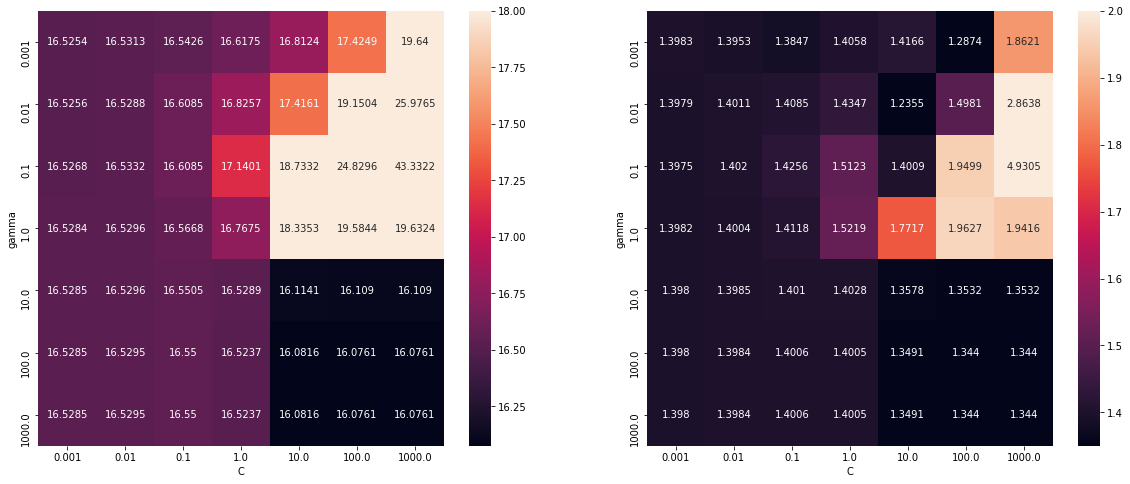

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,8))

sns.heatmap(mse,annot=True,ax=ax[0],fmt='.6g',xticklabels=C_list,yticklabels=gamma_list,vmin=16.076,vmax=18)
sns.heatmap(mse_std,annot=True,ax=ax[1],fmt='.5g',xticklabels=C_list,yticklabels=gamma_list,vmin=1.35,vmax=2)

ax[0].set(xlabel='C',ylabel='gamma')
ax[1].set(xlabel='C',ylabel='gamma')

fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/bmi_male_svm_pca',dpi=300)

In [ ]:
np.min(mse)

16.076083492352605

In [ ]:
svr_regression = SVR(kernel='rbf', gamma=100, C=100).fit(pca_mat_train, BMI_train)

In [ ]:
np.mean((svr_regression.predict(pca_mat_test)-BMI_test)*(svr_regression.predict(pca_mat_test)-BMI_test))

18.65435801911714

In [ ]:
np.mean((svr_regression.predict(pca_mat_train)-BMI_train)*(svr_regression.predict(pca_mat_train)-BMI_train))

0.009841822179813439

In [ ]:
n = len(pca_mat_train)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=2)

alpha_list = [1e-3,1e-2,1e-2*2.5,1e-2*5, 1e-2*7.5,1e-1,1e0]
mse = []
mse_std = []

In [ ]:
pca_mat_train.shape

(2179, 10)

In [ ]:
for alpha in alpha_list:
    score = -1*cross_val_score(KernelRidge(kernel='rbf', alpha=alpha), pca_mat_train, BMI_train, cv=kf_10, scoring='neg_mean_squared_error')
    mse_std.append(score.std())
    mse.append(score.mean()) 


In [ ]:
mse_std

[12.197250748933014,
 13.321976653024464,
 13.945813794390226,
 14.361642683714605,
 14.61488768223804,
 14.809519995467953,
 17.491689683482825]

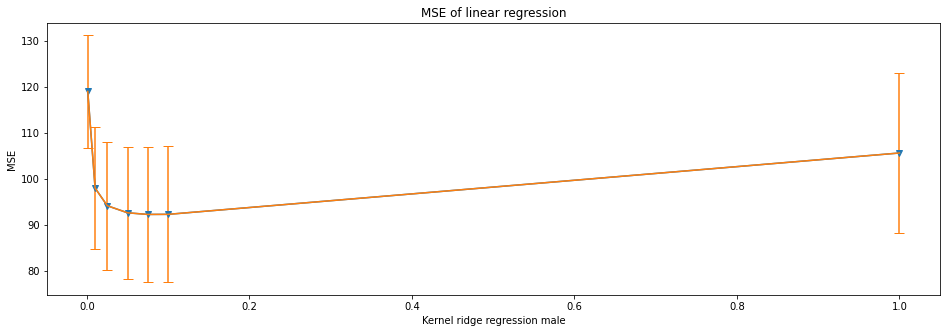

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(16,5))
ax.plot(alpha_list,mse, '-v')
ax.errorbar(x=alpha_list,
             y=mse,
             yerr=mse_std,
             capsize=5)
ax.set_xlabel('Kernel ridge regression male')
ax.set_ylabel('MSE')
ax.set_title('MSE of linear regression')
fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/bmi_male_kernelridge_pca',dpi=300)

92.28860652644337

In [ ]:
# this is for male children
tem_OTUs = select_OTUs_female[select_age_cat_female>=2]
tem_BMI = select_BMI_female[select_age_cat_female>=2]

In [ ]:
# scale for PCA

scaler = StandardScaler()
scaler.fit(tem_OTUs)
OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 10
pca = PCA(n_components=n_pc)
pca_mat = pca.fit_transform(OTUs_scale)    # project the original data into the PCA space

In [ ]:
pca_mat_train, pca_mat_test, BMI_train, BMI_test = train_test_split(pca_mat, tem_BMI, test_size=0.3)

In [ ]:
n = len(pca_mat_train)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=2)

C_list = [1e-3,1e-2,1e-1,1e0, 1e1,1e2,1e3]
gamma_list = [1e-3,1e-2,1e-1,1e0, 1e1, 1e2,1e3]
mse = []
mse_std = []

In [ ]:
for gamma in gamma_list:
    for C in C_list:
        score = -1*cross_val_score(SVR(kernel='rbf', gamma=gamma, C=C), pca_mat_train, BMI_train, cv=kf_10, scoring='neg_mean_squared_error')
        mse_std.append(score.std())
        mse.append(score.mean()) 


In [ ]:
mse_std = np.array(mse_std).reshape(7,7)
mse  = np.array(mse).reshape(7,7)

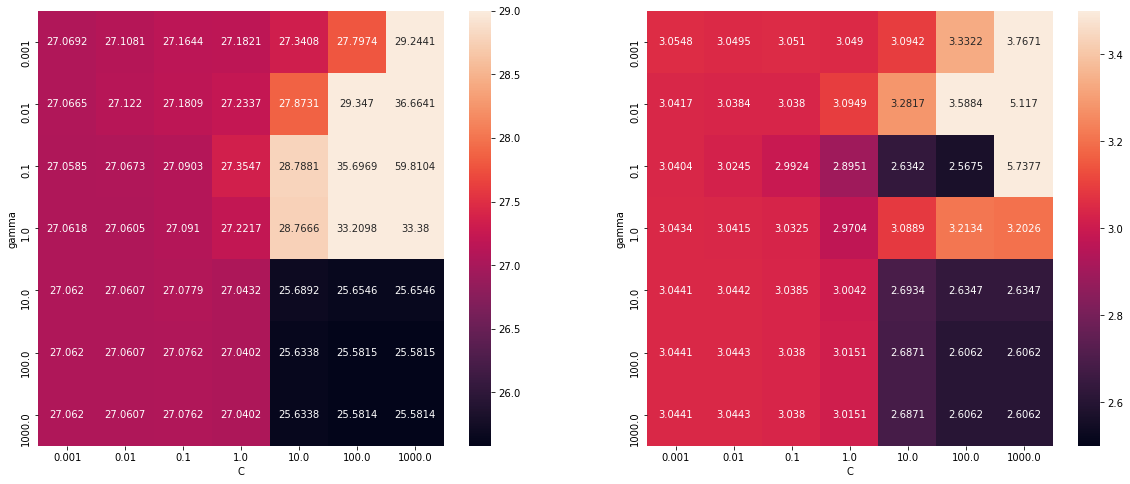

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,8))

sns.heatmap(mse,annot=True,ax=ax[0],fmt='.6g',xticklabels=C_list,yticklabels=gamma_list,vmin=25.58,vmax=29)
sns.heatmap(mse_std,annot=True,ax=ax[1],fmt='.5g',xticklabels=C_list,yticklabels=gamma_list,vmin=2.5,vmax=3.5)

ax[0].set(xlabel='C',ylabel='gamma')
ax[1].set(xlabel='C',ylabel='gamma')

fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/bmi_female_svm_pca',dpi=300)

In [ ]:
mse

array([[27.06919931, 27.1080727 , 27.16443729, 27.18209592, 27.34078631,
        27.7973748 , 29.24414309],
       [27.06648118, 27.1220482 , 27.18088437, 27.23367117, 27.87306448,
        29.34703756, 36.66412401],
       [27.0584809 , 27.06727876, 27.09033747, 27.35472415, 28.78814885,
        35.69694445, 59.81042737],
       [27.06179464, 27.06054855, 27.09099083, 27.22173938, 28.76661308,
        33.20982581, 33.38001124],
       [27.0619965 , 27.06071577, 27.07794451, 27.04317639, 25.68917183,
        25.65458487, 25.65458487],
       [27.06198677, 27.06066309, 27.07619292, 27.04016937, 25.63380736,
        25.58145276, 25.58145276],
       [27.06198677, 27.06066307, 27.07619197, 27.04017087, 25.63380402,
        25.58144686, 25.58144686]])

In [ ]:
np.min(mse)

25.581446864384333

In [ ]:
svr_regression = SVR(kernel='rbf', gamma=1000, C=1000).fit(pca_mat_train, BMI_train)

In [ ]:
np.mean((svr_regression.predict(pca_mat_test)-BMI_test)*(svr_regression.predict(pca_mat_test)-BMI_test))

23.61548024829939

In [ ]:
np.mean((svr_regression.predict(pca_mat_train)-BMI_train)*(svr_regression.predict(pca_mat_train)-BMI_train))

0.009885810773798458

In [ ]:
n = len(pca_mat_train)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=2)

alpha_list = [1e-3,1e-2,1e-2*2.5,1e-2*5, 1e-2*7.5,1e-1,1e0]
mse = []
mse_std = []

In [ ]:
for alpha in alpha_list:
    score = -1*cross_val_score(KernelRidge(kernel='rbf', alpha=alpha), pca_mat_train, BMI_train, cv=kf_10, scoring='neg_mean_squared_error')
    mse_std.append(score.std())
    mse.append(score.mean()) 


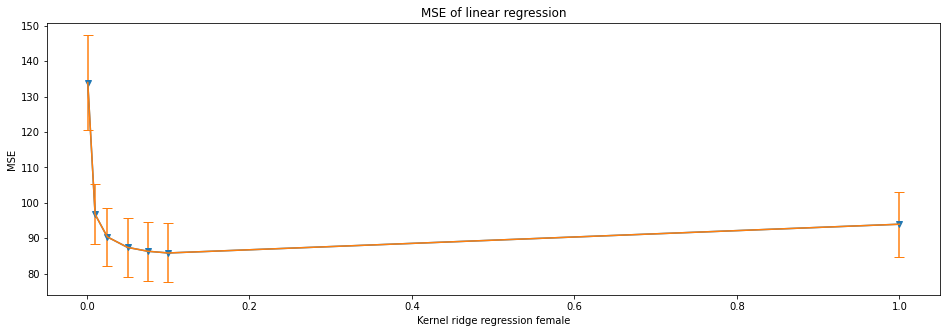

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(16,5))
ax.plot(alpha_list,mse, '-v')
ax.errorbar(x=alpha_list,
             y=mse,
             yerr=mse_std,
             capsize=5)
ax.set_xlabel('Kernel ridge regression female')
ax.set_ylabel('MSE')
ax.set_title('MSE of linear regression')
fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/bmi_female_kernelridge_pca',dpi=300)